#0. 시작

##0.1 코랩 환경 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##0.2 library 불러오기, 필요한 데이터 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#실행시키고 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,663 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')

In [ ]:
#제공 받은 데이터
data1 = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/일반가구_2020_20220113_83403.csv', encoding = 'cp949')
data2 = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/이용가구_2020_20220116_92345.csv', encoding = 'cp949')
sell_apart = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/부동산실거래가/매매 실거래가/전국_아파트(매매).csv')
sell_dandok = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/부동산실거래가/매매 실거래가/전국_단독다가구(매매).csv')
sell_yearlip = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/부동산실거래가/매매 실거래가/전국_연립다세대(매매).csv')
sell_office = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/부동산실거래가/매매 실거래가/전국_오피스텔(매매).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#외부 데이터
popul = pd.read_csv('/content/drive/Shareddrives/EDA D조/DATA/외부데이터/행정구역_시군구_별__성별_인구수_20220124153025.csv', header = 1, encoding = 'cp949')

##0.3 불러온 데이터 확인

설문조사 데이터부터 전처리하자.

In [ ]:
data1.head()

,가1. 결혼 여부,가2. 가구주 여부,가3. 가구주 연령,가4. (가구주가 아닌) 본인 또는 배우자 연령,가5. 응답자 성별,나1. 점유형태,나2. 이전 주택 점유형태,나3. 거주주택 유형,나4. 거주주택 면적,나5. 보유주택 수,나6. 보유 분양권/입주권 수,나7. 보유주택 지역,나8. 보유주택 구입 시기 (년),나9. 보유주택 현재 시세 (만원),나10. 보유주택 면적,나11. 보유주택 취득 방법,나12. 보유주택 구입 이유,나13. 전세 보증금 (만원),나13. 보증부월세 보증금 (만원),나13. 보증부월세 월세금 (만원),나13. 순수월세 보증금 (만원),다1. (M)이용 중인 주택금융상품 - 주택담보대출,다1. (M)이용 중인 주택금융상품 - 전세자금대출,다1. (M)이용 중인 주택금융상품 - 월세자금대출,다1. (M)이용 중인 주택금융상품 - 중도금대출,다1. (M)이용 중인 주택금융상품 - 이용하고 있지 않음,다2. 주택담보대출 이용상품,다3. 주택담보대출 상품 인지 경로,다4. 주택담보대출 상품 선택 이유 (1순위),다4. 주택담보대출 상품 선택 이유 (2순위),다5. 주택담보대출금액 (만원),다6. 주택담보대출 당시 주택가격 (만원),다7. 주택담보대출 만기,다8. 주택담보대출금액 금리유형 인식,다9. 주택담보대출 금리 (%),다10. 주택담보대출 월 상환금액 (만원),다11. 주택담보대출 만족도,다12. 주택담보대출 만족 요인 (1순위),다12. 주택담보대출 만족 요인 (2순위),다13. 주택담보대출 불만족 요인 (1순위),...,바5. (M)주택담보대출 상품 개편 시 우선 개선점_4,바5. (M)주택담보대출 상품 개편 시 우선 개선점_5,바6. 청년전세자금보증과 청년월세자금보증 중 더 도움이 되는 상품,바7. 청년전세자금보증이 더 도움이 되는 이유,바8. 청년월세자금보증이 더 도움이 되는 이유,사1. 맞벌이 여부,사2. 자녀유무,사3. 자녀 수,사4. 1인가구 여부,사5. 월 평균 총 가구소득 (만원),사6. 가구 총 자산 (만원),사7. 가구 총 부채 (만원),사8. 가구주 학력,사9. 가구주 직업,사9. 가구주 직업 - 관리자,사9. 가구주 직업 - 전문가 및 관련 종사자,사9. 가구주 직업 - 사무 종사자,사9. 가구주 직업 - 서비스 종사자,사9. 가구주 직업 - 판매 종사자,사9. 가구주 직업 - 농림어업 관련 종사자,사9. 가구주 직업 - 기능원 및 관련 기능 종사자,사9. 가구주 직업 - 장치/기계조작 및 조립 종사자,사9. 가구주 직업 - 단순노무 종사자,거주지역,결혼여부,가구주 연령,성별,주택 보유/거주,주택 보유여부,주택보유수,보유주택 지역,주택담보대출 이용상품,전세자금대출 이용상품,주택담보대출 이용의향 상품,전세자금대출 이용의향상품,1인가구 여부,가구소득(소득분위),가구소득,가구주 직업,◎가중치
0,1,1,24,24.0,2,3,7,6,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,20.0,NaN,NaN,NaN,NaN,NaN,9998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,4.0,NaN,1.0,1.0,NaN,2,200,500,0,3,4,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,3,1,1,NaN,3,2,NaN,NaN,NaN,NaN,2.0,NaN,2,2,NaN,4,1.066228
1,1,1,25,31.0,1,2,7,1,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1.0,NaN,2.0,2.0,1.0,2,390,8000,2000,2,1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,NaN,3,2,NaN,NaN,NaN,1.0,3.0,NaN,2,3,NaN,1,1.710461
2,1,1,26,25.0,1,3,7,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,15.0,NaN,NaN,NaN,NaN,NaN,9998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,1,1.0,NaN,1.0,1.0,NaN,2,300,2000,0,2,7,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,4,1,1,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,5,1.619471
3,1,1,27,27.0,1,3,7,5,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,30.0,NaN,NaN,NaN,NaN,NaN,9998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,3.0,NaN,1.0,1.0,NaN,2,350,4000,0,2,7,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,4,1,1,NaN,3,2,NaN,NaN,NaN,NaN,NaN,1.0,2,3,NaN,5,1.691871
4,1,1,28,28.0,1,3,3,4,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,50.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,1,1.0,NaN,1.0,1.0,NaN,2,400,6000,4000,3,5,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,3,1,1,NaN,3,2,NaN,NaN,NaN,NaN,NaN,1.0,2,4,NaN,4,1.065788


In [ ]:
data2.head()

,가1. 지역 (시도),가2. 지역 (시군구),가4. 보금자리론/내집마련 디딤돌 대출 이용 여부,가5. 혼인 상태,가6. 가구주 여부,가7. 가구주 연령,가8. (가구주가 아닌) 본인 또는 배우자 연령,가9. 응답자 성별,나1. 이용 보금자리론 및 디딤돌대출 상품 종류,나2. 보금자리론/내집마련 디딤돌대출 정보 주요 획득경로 (1순위),나2. 보금자리론/내집마련 디딤돌대출 정보 주요 획득경로 (2순위),나3. 대출모집인 이용 시 희망 상담 방법,나4. 보금자리론/내집마련 디딤돌대출 금융기관 선택이유,나5. 보금자리론/내집마련 디딤돌대출 선택 시 타 상품 비교 여부,나6. 비교한 타 주택금융상품,나7. 보금자리론/내집마련 디딤돌대출 선택 시 고려사항 (1순위),나7. 보금자리론/내집마련 디딤돌대출 선택 시 고려사항 (2순위),나8. 보금자리론/내집마련 디딤돌대출 상품 만족도,나9. (M)보금자리론 상품 만족 요인_1,나9. (M)보금자리론 상품 만족 요인_2,나9. (M)보금자리론 상품 만족 요인_3,나9. (M)보금자리론 상품 만족 요인_4,나9. (M)보금자리론 상품 만족 요인_5,나9. (M)보금자리론 상품 만족 요인_6,나9. (M)보금자리론 상품 만족 요인_7,나9. (M)보금자리론 상품 만족 요인_8,나9. (M)보금자리론 상품 만족 요인_9,나9. (M)보금자리론 상품 만족 요인_10,나9. (M)보금자리론 상품 만족 요인_11,나9. (M)보금자리론 상품 만족 요인_12,나9. (M)보금자리론 상품 만족 요인_13,나9. (M)보금자리론 상품 만족 요인_14,나10. (M)보금자리론 상품 불만족 요인_1,나10. (M)보금자리론 상품 불만족 요인_2,나10. (M)보금자리론 상품 불만족 요인_3,나10. (M)보금자리론 상품 불만족 요인_4,나10. (M)보금자리론 상품 불만족 요인_5,나10. (M)보금자리론 상품 불만족 요인_6,나10. (M)보금자리론 상품 불만족 요인_7,나10. (M)보금자리론 상품 불만족 요인_8,...,나18. 더나은 보금자리론 적절한 대출 조건 수준 - LTV (%),나18. 더나은 보금자리론 대출 조건 수준 - DTI: 변경필요 여부,나18. 더나은 보금자리론 적절한 대출 조건 수준 - DTI (%),나19. 유한책임 보금자리론 대출 조건 수준 - 주택가격: 변경필요 여부,나19. 유한책임 보금자리론 적절한 대출 조건 수준 - 주택가격 (억원),나19. 유한책임 보금자리론 대출 조건 수준 - 대출한도: 변경필요 여부,나19. 유한책임 보금자리론 적절한 대출 조건 수준 - 대출한도 (억원),나19. 유한책임 보금자리론 대출 조건 수준 - 다자녀 대출한도 확대 적용 여부,나19. 유한책임 보금자리론 대출 조건 수준 - 소득요건: 변경필요 여부,나19. 유한책임 보금자리론 적절한 대출 조건 수준 - 소득요건 (백만원),나19. 유한책임 보금자리론 대출 조건 수준 - 신혼 및 다자녀 소득요건 확대 적용 여부,나20. 월평균 소득 대비 적정 원리금상환액 수준 (%),나21. 주택담보대출 희망 대출 만기,나22. 초장기 주택담보대출 희망 대출 만기,나23. 원리금 상환기간 선택 시 고려사항 (1순위),나23. 원리금 상환기간 선택 시 고려사항 (2순위),다1. 보금자리론/내집마련 디딤돌대출금 조기상환 의향,다2. 보금자리론/내집마련 디딤돌대출금 조기상환 의향 이유,라1. 자녀 여부 및 자녀 수,라2. 가구주 학력,라3. 월 평균 가구소득 (싱글값),라4. 단독 세대주 여부,라5. 가구주 직업,라5. 가구주 직업 - 관리자,라5. 가구주 직업 - 전문가 및 관련 종사자,라5. 가구주 직업 - 사무 종사자,라5. 가구주 직업 - 서비스 종사자,라5. 가구주 직업 - 판매 종사자,라5. 가구주 직업 - 농림어업 관련 종사자,라5. 가구주 직업 - 기능원 및 관련 기능 종사자,라5. 가구주 직업 - 장치/기계조작 및 조립 종사자,라5. 가구주 직업 - 단순노무 종사자,거주 지역,가구주 연령,가구 소득,가구주 직업,결혼 여부,단독 세대주 여부,공사 주택담보대출 이용상품,◎가중치
0,1,1.0,1,1,1,35,NaN,1,2,6,NaN,1,2.0,2,NaN,1,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,9999,NaN,9999,NaN,9999,9999,NaN,9999,20,3,NaN,5,2.0,1,1.0,2.0,2,3,2,3,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,3,1,2,2,0.917332
1,1,1.0,1,2,1,56,NaN,2,3,4,NaN,1,NaN,1,1.0,1,2.0,5,1.0,2.0,3.0,NaN,5.0,NaN,7.0,8.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9999,NaN,9999,NaN,9999,NaN,9999,9999,NaN,9999,50,6,NaN,2,NaN,3,NaN,3.0,3,4,2,4,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,1,4,3,4,2,2,3,0.991537
2,1,1.0,1,3,1,24,NaN,2,2,5,6.0,1,5.0,2,NaN,2,1.0,5,1.0,NaN,NaN,NaN,5.0,NaN,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,2,1,NaN,1,30,5,NaN,1,2.0,2,3.0,NaN,3,2,1,3,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,3,3,1,2,0.768207
3,1,10.0,1,1,1,35,NaN,1,2,6,NaN,1,2.0,2,NaN,1,2.0,4,1.0,2.0,3.0,NaN,5.0,6.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.0,9999,NaN,9999,NaN,9999,NaN,9999,9999,NaN,9999,20,5,NaN,1,2.0,1,6.0,2.0,3,2,2,4,NaN,NaN,NaN,9997.0,NaN,NaN,NaN,NaN,NaN,1,2,2,4,1,2,2,0.917332
4,1,10.0,1,1,1,37,NaN,1,2,4,NaN,1,1.0,2,NaN,1,2.0,5,1.0,2.0,3.0,NaN,NaN,6.0,NaN,8.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,1,NaN,1,15,6,NaN,2,1.0,2,5.0,3.0,3,5,2,1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,5,1,1,2,2,0.917332


In [ ]:
sell_apart.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,655-2,655,2.0,개포2차현대아파트(220),77.75,202006,23,"149,500",4,1988,언주로 103,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658,1.0,개포6차우성아파트1동~8동,54.98,202002,24,"144,000",4,1987,언주로 3,NaN,-,-
2,서울특별시 강남구 개포동,658-1,658,1.0,개포6차우성아파트1동~8동,79.97,202006,18,"162,750",4,1987,언주로 3,NaN,-,-
3,서울특별시 강남구 개포동,658-1,658,1.0,개포6차우성아파트1동~8동,79.97,202006,20,"160,000",5,1987,언주로 3,NaN,-,-
4,서울특별시 강남구 개포동,658-1,658,1.0,개포6차우성아파트1동~8동,79.97,202006,22,"150,000",2,1987,언주로 3,NaN,-,-


In [ ]:
sell_dandok.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명,해제사유발생일,거래구분,중개사사무소
0,강원도 강릉시 강동면 모전리,3**,다가구,12m미만,217.75,244.0,202001,2,"38,000",2018.0,단경로,NaN,-,-
1,강원도 강릉시 강동면 모전리,4**,단독,8m미만,158.95,615.0,202012,24,"28,414",2017.0,범울재길,NaN,-,-
2,강원도 강릉시 강동면 산성우리,1**,단독,8m미만,187.99,496.0,202001,2,"26,000",2000.0,오이양지길,NaN,-,-
3,강원도 강릉시 강동면 상시동리,1**,단독,8m미만,101.88,326.0,202010,21,"11,500",2011.0,와천로,NaN,-,-
4,강원도 강릉시 강동면 상시동리,2**,단독,8m미만,117.70,562.0,202004,3,"17,000",2005.0,시동1길,NaN,-,-


In [ ]:
sell_yearlip.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 강동면 산성우리,219-3,219,3,정동진우리하우스텔2,27.3500,39.53,202002,5,"5,000",3,2012.0,오이양지길 32-7,NaN,-,-
1,강원도 강릉시 강동면 산성우리,219-3,219,3,정동진우리하우스텔2,27.3500,39.53,202002,5,"5,000",4,2012.0,오이양지길 32-7,NaN,-,-
2,강원도 강릉시 교동,302,302,0,까르빌,65.1875,48.84,202009,23,"18,500",5,2018.0,화부산로141번안길 3,NaN,-,-
3,강원도 강릉시 교동,834-1,834,1,대동,53.2300,73.80,202002,20,"3,700",3,1983.0,옛강일길 30,NaN,-,-
4,강원도 강릉시 교동,834-1,834,1,대동,53.2300,73.80,202005,17,"4,800",2,1983.0,옛강일길 30,NaN,-,-


In [ ]:
sell_office.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 교동,1883-6,1883,6,(1883-6),32.99,202003,4,"15,977",9,2019.0,솔올로5번길 47,NaN,-,-
1,강원도 강릉시 교동,1883-6,1883,6,(1883-6),32.99,202003,5,"15,466",9,2019.0,솔올로5번길 47,NaN,-,-
2,강원도 강릉시 교동,1883-6,1883,6,(1883-6),33.54,202003,5,"16,318",9,2019.0,솔올로5번길 47,NaN,-,-
3,강원도 강릉시 교동,140-16,140,16,강릉역 블루핀,22.00,202008,3,"11,948",9,2020.0,강릉대로 285,20201229.0,-,-
4,강원도 강릉시 교동,140-16,140,16,강릉역 블루핀,22.00,202008,12,"12,310",11,2020.0,강릉대로 285,NaN,-,-


In [ ]:
popul.head()

,행정구역(시군구)별,총인구수 (명)
0,서울특별시,9668465
1,종로구,149384
2,중구,125240
3,용산구,230040
4,성동구,293556


##0.4 전처리-설문조사
column이 너무 많아 가독성이 안 좋다. data를 자르자.

In [ ]:
#모든 행이 nan인 column 삭제
data1.dropna(axis = 1, how = 'all', inplace = True)
data2.dropna(axis = 1, how = 'all', inplace = True)

#데이터의 각 컬럼에 '가','나',... 로 번호가 붙어있으므로 그에 맞추어 slicing
data1_reduced = data1.loc[:,:'거주지역']
data2_reduced = data2.loc[:,:'거주 지역']

idx1 = ['가', '나', '다', '라', '마', '바', '사']
data1_idx1 = list()
data1_idx2 = list()
data1_idx3 = list()
data1_idx4 = list()
data1_idx5 = list()
data1_idx6 = list()
data1_idx7 = list()
data1_idx8 = list()
for idx in data1_reduced.columns:
    if idx[0] == '가':
        data1_idx1.append(idx)
    elif idx[0] == '나':
        data1_idx2.append(idx)
    elif idx[0] == '다':
        data1_idx3.append(idx)
    elif idx[0] == '라':
        data1_idx4.append(idx)
    elif idx[0] == '마':
        data1_idx5.append(idx)
    elif idx[0] == '바':
        data1_idx6.append(idx)
    elif idx[0] == '사':
        data1_idx7.append(idx)

idx2 = ['가', '나', '다', '라']
data2_idx1 = list()
data2_idx2 = list()
data2_idx3 = list()
data2_idx4 = list()
for idx2 in data2_reduced.columns:
    if idx2[0] == '가':
        data2_idx1.append(idx2)
    elif idx2[0] == '나':
        data2_idx2.append(idx2)
    elif idx2[0] == '다':
        data2_idx3.append(idx2)
    elif idx2[0] == '라':
        data2_idx4.append(idx2)

In [ ]:
data11 = data1_reduced.loc[:,data1_idx1]      #가. 설문자 정보 
data12 = data1_reduced.loc[:,data1_idx2]      #나. 보유 주택 정보
data13 = data1_reduced.loc[:,data1_idx3]      #다. 주택 금융 상품, 주택(전세) 담보 대출 정보
data14 = data1_reduced.loc[:,data1_idx4]      #라. 향후 주택 구매 의향 정보
data15 = data1_reduced.loc[:,data1_idx5]      #마. 향후 주택 금융 상품 이용, 금리에 대한 예상 정보
data16 = data1_reduced.loc[:,data1_idx6]      #바. 주택 및 규제, 담보 대출 상품에 대한 생각
data17 = data1_reduced.loc[:,data1_idx7]      #사. 설문자 정보
data18 = data1.loc[:, '거주지역':]            # 설문자 정보

In [ ]:
data21 = data2_reduced.loc[:,data2_idx1]      #가. 설문자 정보 
data22 = data2_reduced.loc[:,data2_idx2]      #나. 보유 주택 정보
data23 = data2_reduced.loc[:,data2_idx3]      #다. 주택 금융 상품, 주택(전세) 담보 대출 정보
data24 = data2_reduced.loc[:,data2_idx4]      #라. 향후 주택 구매 의향 정보
data25 = data2.loc[:, '거주 지역':]           # 설문자 정보

##0.5 전처리-매매 데이터
필요없는 열은 삭제하고, '시군구','거래금액(만원)' column만 살리자

In [ ]:
apart = sell_apart[['시군구', '거래금액(만원)']].copy()
dandok = sell_dandok[['시군구', '거래금액(만원)']].copy()
yearlip = sell_yearlip[['시군구', '거래금액(만원)']].copy()
office = sell_office[['시군구', '거래금액(만원)']].copy()

아파트와 아파트가 아닌 것으로 구분할 것이기 때문에 단독, 연립, 오피스텔을 concat하자.

In [ ]:
noapart_list = [dandok, yearlip, office]
noapart = pd.concat(noapart_list)
noapart.reset_index(inplace = True)

데이터의 '시군구'를 띄어쓰기 단위로 잘라 따로 데이터프레임의 열로 만들자

그리고 '거래금액(만원)'열에 ','가 있어 int로 인식을 못하므로 ','를 제거하자

In [ ]:
apart['first'] = apart['시군구'].str.split().str[0]
apart['second'] = apart['시군구'].str.split().str[1]
apart['거래금액(만원)'] = apart['거래금액(만원)'].str.replace(',','')
apart = apart.astype({'거래금액(만원)' : 'int'})
noapart['first'] = noapart['시군구'].str.split().str[0]
noapart['second'] = noapart['시군구'].str.split().str[1]
noapart['거래금액(만원)'] = noapart['거래금액(만원)'].str.replace(',','')
noapart = noapart.astype({'거래금액(만원)' : 'int'})

전처리한 데이터 확인

In [ ]:
apart.head()

,시군구,거래금액(만원),first,second
0,서울특별시 강남구 개포동,149500,서울특별시,강남구
1,서울특별시 강남구 개포동,144000,서울특별시,강남구
2,서울특별시 강남구 개포동,162750,서울특별시,강남구
3,서울특별시 강남구 개포동,160000,서울특별시,강남구
4,서울특별시 강남구 개포동,150000,서울특별시,강남구


In [ ]:
noapart.head()

,index,시군구,거래금액(만원),first,second
0,0,강원도 강릉시 강동면 모전리,38000,강원도,강릉시
1,1,강원도 강릉시 강동면 모전리,28414,강원도,강릉시
2,2,강원도 강릉시 강동면 산성우리,26000,강원도,강릉시
3,3,강원도 강릉시 강동면 상시동리,11500,강원도,강릉시
4,4,강원도 강릉시 강동면 상시동리,17000,강원도,강릉시


데이터 전처리 완료

#1. 대본 시작

#0. 도입

의, 식, 주.
사람이 기본적인 삶을 영위하기 위한 3대 조건입니다.
지금 여기 계시는 분들 중 대다수가 
다행히도 옷을 입고 계시고,
오늘 최소 한 끼 이상 드셨을 겁니다.
그렇다면, 혹시 여러분 중 딱 한 개라도
내 소유의 부동산을 갖고 계신 분 있나요?

의식주 가운데 가장 충족시키기 힘든 조건이 주거입니다.
이러한 주거 고민을 덜어 드리기 위해
한국주택금융공사에서 제공하는 대출 상품이 있습니다.
바로 오늘 저희의 주제인 내집마련디딤돌대출과, 보금자리론입니다.


#1. 서론

##1.1 데이터셋 설명

저희 조가 선택한 데이터셋, "주택 실거래가"였습니다.
여러 파일들이 섞여 있었는데요

첫번째는 실거래가 데이터입니다.
2020년 국내의 모든 부동산 거래 이력과 정보가 기록된 파일입니다.
주택 종류, 지역, 거래가 등이 들어 있었고
아파트 매매의 경우 거래 이력이 80만 건 이상일만큼 크기가 방대했습니다.

두번째는 내집마련디딤돌대출, 보금자리론 이용자 
2000명을 대상으로 한 설문조사입니다.
직업, 결혼여부, 가구형태, 연령 등의 기초정보와,
만족도, 만족하는 이유, 대출 한도 등에 대한 의견이 담겨 있습니다.

마지막은 이 상품들을 이용하지 않은 일반 가구 5000명 대상 설문조사입니다.
방문 조사 방식으로 수집됐고,
기초정보 조사와 함께 대출 이용 의향, 희망하는 금리 형태
등에 대한 의견도 함께 조사됐습니다.

저희는 이 중 설문 조사 파일에 집중했습니다.
디딤돌대출과 보금자리론이 사람들에게 어떤 평가를 받고 있고,
그렇게 평가받은 이유는 무엇인지, 나아가야 할 방향은 어떤지,
지금부터 종합적으로 살펴 보겠습니다.



##1.2 디딤돌대출/보금자리론 설명

그 전에 보금자리론과 디딤돌 대출에 대해 간단히 살펴 보겠습니다.
보금자리론은 연 소득 7천만원 이하인 무주택자, 혹은 1주택자에게
최대 3억 6천만원까지 연 3% 초반의 고정금리로 대출해주는 상품입니다.
신규 주택구입, 전세자금반환, 기존 주택담보대출 상환 등,
다양한 목적으로 대출이 가능합니다.

그리고 내집마련 디딤돌대출은
연 소득 6천만원 이하인 무주택자에게
주택구입 목적으로 최대 3억 1천만원까지
연 2%대의 고정금리로 대출해주는 상품입니다.

참고로 보금자리론에는 u, 아낌e, t
이렇게 세 종류가 있는데요.
조건은 다 똑같고 신청 방식만 조금씩 다르다고 보시면 되겠습니다.

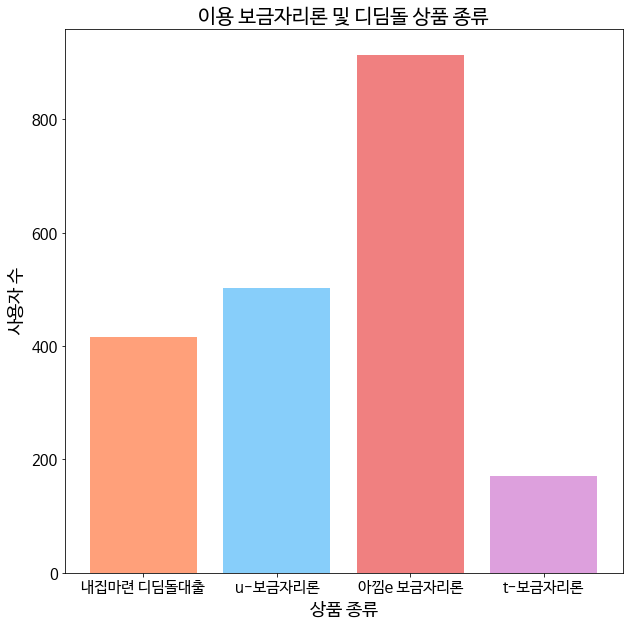

In [ ]:
x = ['1', '2', '3', '4']
x_axis = np.arange(len(x))

plt.figure(figsize = (10,10))
plt.bar(x_axis, data22.iloc[:,0].value_counts().sort_index(),
        color = ['lightsalmon', 'lightskyblue', 'lightcoral', 'plum'])
  
plt.xticks(x_axis, x)
plt.xlabel("상품 종류", fontsize=18)
plt.ylabel("사용자 수", fontsize=18)
plt.title("이용 보금자리론 및 디딤돌 상품 종류", fontsize=20)
plt.xticks(ticks = range(0,len(x)),
           labels = ['내집마련 디딤돌대출', 'u-보금자리론', '아낌e 보금자리론',
                    't-보금자리론'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("1.png", transparent = True)

#이건 굳이 사용 안 해도 될 것 같긴 한데 우선 넣어봤습니다.

##1-3) 변수 설명 / 설문 결과

이제 설문 조사 결과를 살펴 보겠습니다.
먼저 이용 고객 대상 설문입니다.
디딤돌대출과 보금자리론, 어디서 알게 됐습니까?


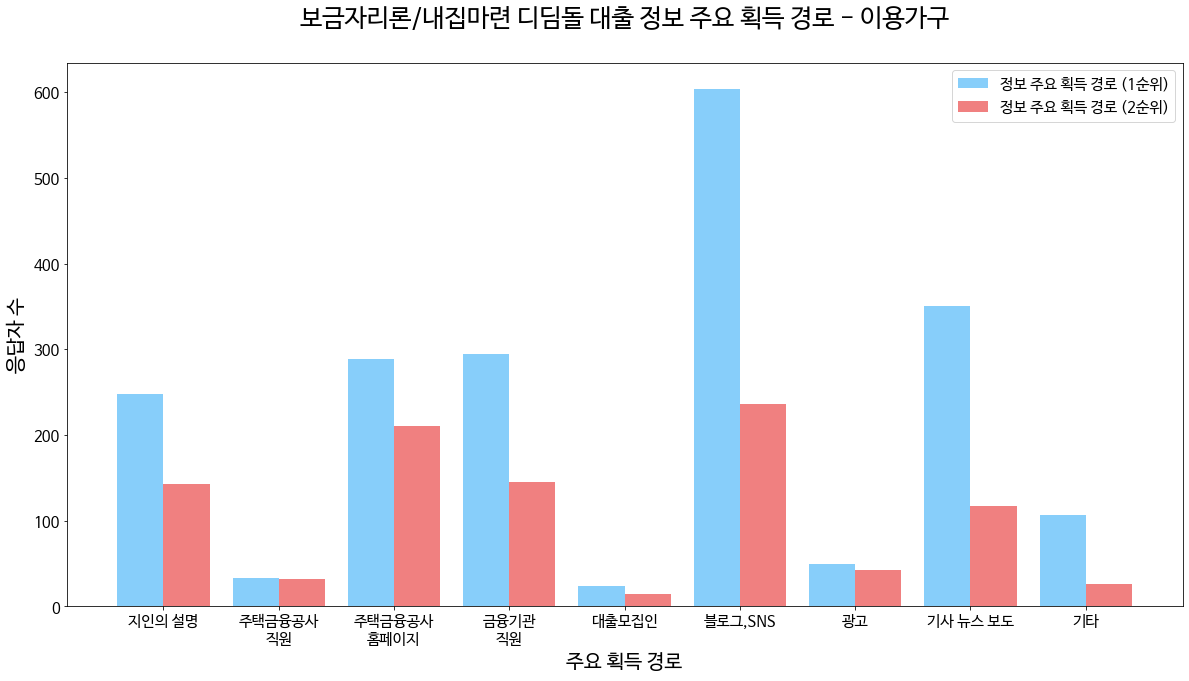

In [ ]:
x = [x+1 for x in range(9)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis-0.2, data22.iloc[:,1].value_counts().sort_index(), 
        label = '정보 주요 획득 경로 (1순위)', color = 'lightskyblue', width = 0.4)
plt.bar(x_axis+0.2, data22.iloc[:,2].value_counts().sort_index(), 
        label = '정보 주요 획득 경로 (2순위)', color = 'lightcoral', width = 0.4)
plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['지인의 설명', '주택금융공사\n직원', '주택금융공사\n홈페이지',
                   '금융기관\n직원', '대출모집인' , 
                    '블로그,SNS', '광고', 
                    '기사 뉴스 보도', '기타'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('주요 획득 경로', fontsize = 20)
plt.ylabel('응답자 수', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.title('보금자리론/내집마련 디딤돌 대출 정보 주요 획득 경로 - 이용가구\n', fontsize = 25)
plt.show()

1위는 블로그/SNS, 2위는 주택금융공사 홈페이지였습니다.
주로 3~40대가 이용하는 대출 상품답게
인터넷을 통한 홍보가 활발했습니다.



그렇다면 그 상품을 선택한 이유는 무엇이었느냐.











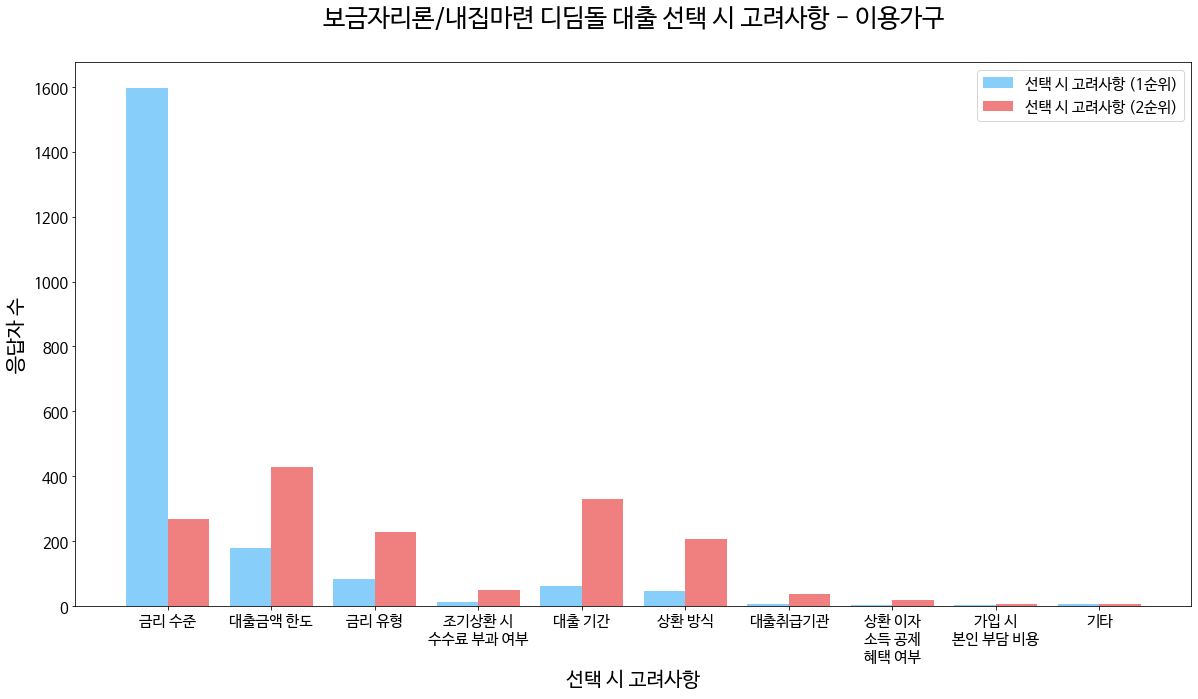

In [ ]:
x = [x+1 for x in range(10)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis-0.2, data22.iloc[:,7].value_counts().sort_index(), 
        label = '선택 시 고려사항 (1순위)', color = 'lightskyblue', width = 0.4)
plt.bar(x_axis+0.2, data22.iloc[:,8].value_counts().sort_index(), 
        label = '선택 시 고려사항 (2순위)', color = 'lightcoral', width = 0.4)
plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['금리 수준', '대출금액 한도', '금리 유형',
                   '조기상환 시\n수수료 부과 여부', '대출 기간' , 
                    '상환 방식', '대출취급기관', '상환 이자\n소득 공제\n혜택 여부', 
                    '가입 시\n본인 부담 비용', '기타'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('선택 시 고려사항', fontsize = 20)
plt.ylabel('응답자 수', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.title('보금자리론/내집마련 디딤돌 대출 선택 시 고려사항 - 이용가구\n', fontsize = 25)
plt.show()

금리 수준이었다는 응답이 압도적으로 많았습니다.
대출금액 한도, 금리 유형 등이라는 응답도 있었으나
가장 강력한 기준은 금리였습니다.


이건 일반 가구에서도 마찬가지였는데요,


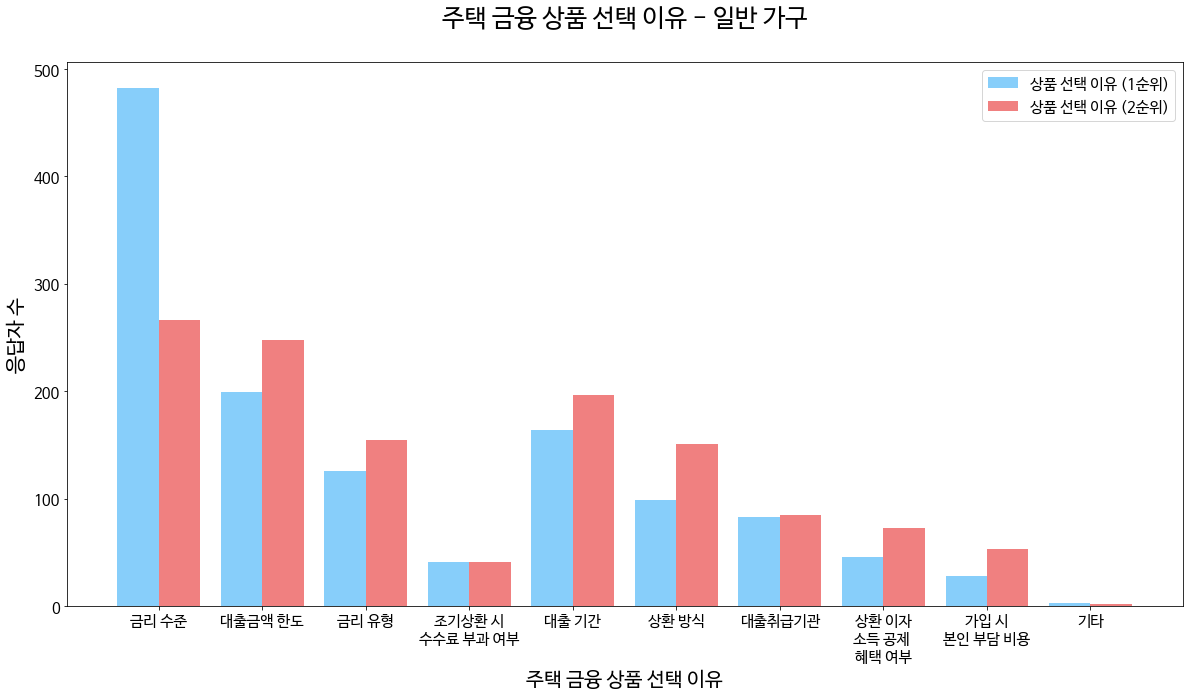

In [ ]:
x = [x+1 for x in range(10)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis-0.2, data13.iloc[:,7].value_counts().sort_index(), 
        label = '상품 선택 이유 (1순위)', color = 'lightskyblue', width = 0.4)
plt.bar(x_axis+0.2, data13.iloc[:,8].value_counts().sort_index(), 
        label = '상품 선택 이유 (2순위)', color = 'lightcoral', width = 0.4)
plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['금리 수준', '대출금액 한도', '금리 유형','조기상환 시\n수수료 부과 여부',
                   '대출 기간', '상환 방식', '대출취급기관','상환 이자\n소득 공제 \n혜택 여부',
                   '가입 시\n본인 부담 비용', '기타'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('주택 금융 상품 선택 이유', fontsize = 20)
plt.ylabel('응답자 수', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.title('주택 금융 상품 선택 이유 - 일반 가구\n', fontsize = 25)
plt.show()

주택 금융 상품을 선택하는 이유,
1위가 금리, 2위가 대출 한도였습니다.

In [ ]:
data22.iloc[:,8].value_counts().sort_index()[1:]

1.0       267
2.0       427
3.0       227
4.0        48
5.0       329
6.0       208
7.0        37
8.0        19
9.0         6
9997.0      6
Name: 나7. 보금자리론/내집마련 디딤돌대출 선택 시 고려사항 (2순위), dtype: int64

In [ ]:
data22.iloc[:,8].value_counts().sort_index()[2:]

2.0       427
3.0       227
4.0        48
5.0       329
6.0       208
7.0        37
8.0        19
9.0         6
9997.0      6
Name: 나7. 보금자리론/내집마련 디딤돌대출 선택 시 고려사항 (2순위), dtype: int64

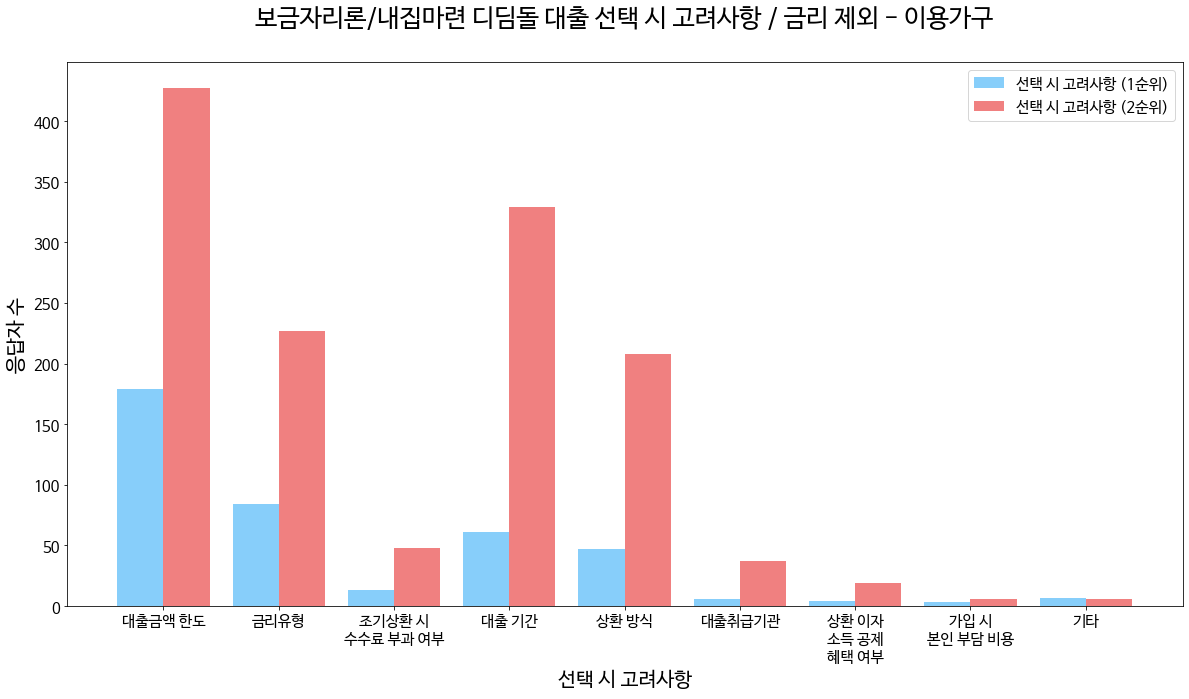

In [ ]:
###금리제거버전
x = [x+1 for x in range(9)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis-0.2, data22.iloc[:,7].value_counts().sort_index()[1:], 
        label = '선택 시 고려사항 (1순위)', color = 'lightskyblue', width = 0.4)
plt.bar(x_axis+0.2, data22.iloc[:,8].value_counts().sort_index()[2:], 
        label = '선택 시 고려사항 (2순위)', color = 'lightcoral', width = 0.4)
plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['대출금액 한도', '금리유형',
                   '조기상환 시\n수수료 부과 여부', '대출 기간' , 
                    '상환 방식', '대출취급기관', '상환 이자\n소득 공제\n혜택 여부', 
                    '가입 시\n본인 부담 비용', '기타'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('선택 시 고려사항', fontsize = 20)
plt.ylabel('응답자 수', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.title('보금자리론/내집마련 디딤돌 대출 선택 시 고려사항 / 금리 제외 - 이용가구\n', fontsize = 25)
plt.show()

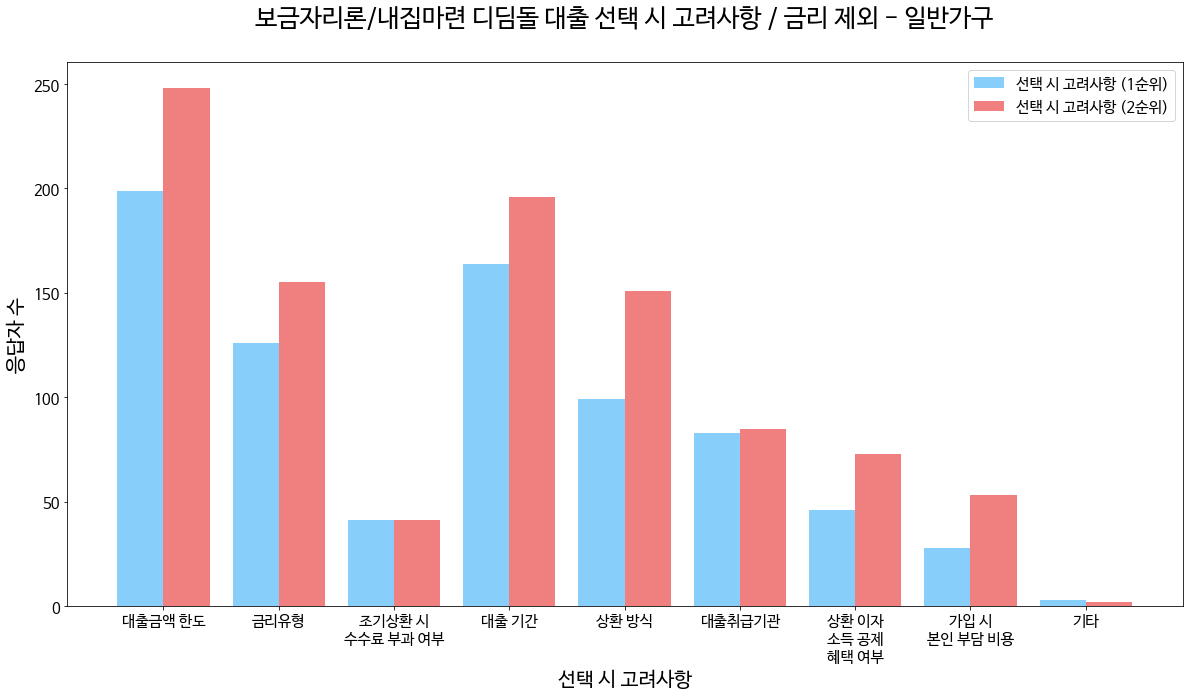

In [ ]:
###금리제거버전
x = [x+1 for x in range(9)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis-0.2, data13.iloc[:,7].value_counts().sort_index()[2:], 
        label = '선택 시 고려사항 (1순위)', color = 'lightskyblue', width = 0.4)
plt.bar(x_axis+0.2, data13.iloc[:,8].value_counts().sort_index()[2:], 
        label = '선택 시 고려사항 (2순위)', color = 'lightcoral', width = 0.4)
plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['대출금액 한도', '금리유형',
                   '조기상환 시\n수수료 부과 여부', '대출 기간' , 
                    '상환 방식', '대출취급기관', '상환 이자\n소득 공제\n혜택 여부', 
                    '가입 시\n본인 부담 비용', '기타'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('선택 시 고려사항', fontsize = 20)
plt.ylabel('응답자 수', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.title('보금자리론/내집마련 디딤돌 대출 선택 시 고려사항 / 금리 제외 - 일반가구\n', fontsize = 25)
plt.show()

만족도도 알아 봤는데요,


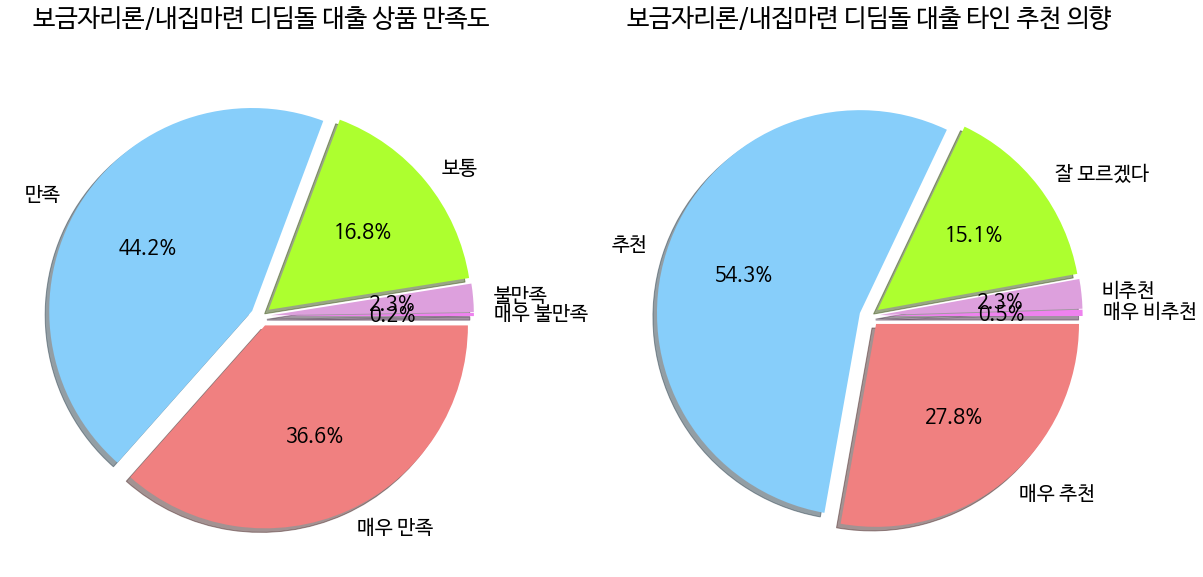

만족도 평균 : 4.145


In [ ]:
plt.subplots(1,2,figsize = (20,10))
plt.subplot(1,2,1)
plt.pie(data22.iloc[:,9].value_counts().sort_index(),
       labels = ['매우 불만족', '불만족', '보통','만족','매우 만족'],
        shadow = True,
        explode= [0.05] * 5,
        autopct = '%1.1f%%',
        colors = ['violet','plum','greenyellow','lightskyblue', 'lightcoral'],
        textprops = {'fontsize':20})
plt.title('보금자리론/내집마련 디딤돌 대출 상품 만족도\n', fontsize = 25)

plt.subplot(1,2,2)
plt.pie(data22.iloc[:,34].value_counts().sort_index(),
       labels = ['매우 비추천', '비추천', '잘 모르겠다','추천','매우 추천'],
        shadow = True,
        explode= [0.05] * 5,
        autopct = '%1.1f%%',
        colors = ['violet','plum','greenyellow','lightskyblue', 'lightcoral'],
        textprops = {'fontsize':20})
plt.title('보금자리론/내집마련 디딤돌 대출 타인 추천 의향\n', fontsize = 25)

plt.show()

print('만족도 평균 :', data22.iloc[:,9].mean())

만족, 매우 만족이라고 답한 사람이 대다수였습니다.
모든 상품에서 평균 만족도 점수가 5점 만점에 4점 이상이었습니다.
상당히 좋은 평가를 받고 있습니다.



만족하는 이유로는,


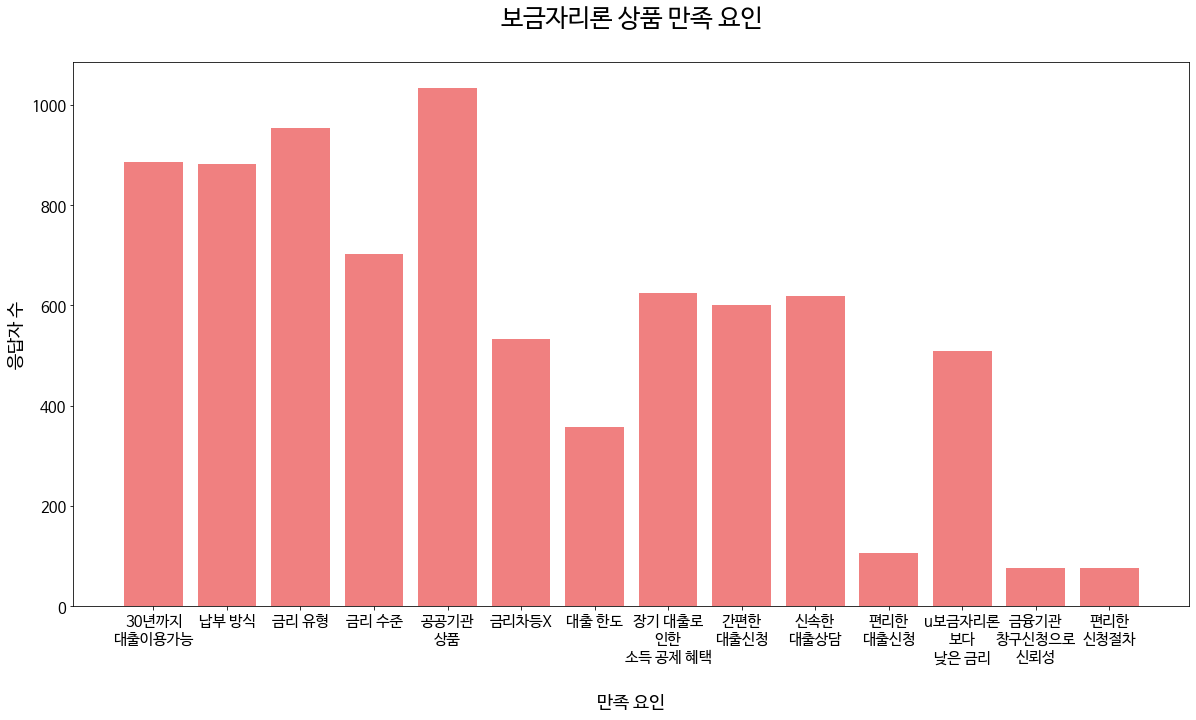

In [ ]:
x = [i+1 for i in range(14)]
x_axis = np.arange(len(x))

plt.figure(figsize = (20,10))
plt.bar(x_axis, data22.iloc[:,10:24].count(), color='lightcoral')
  
plt.xticks(x_axis, x)
plt.xlabel("\n만족 요인", fontsize=18)
plt.ylabel("응답자 수", fontsize=18)
plt.title("보금자리론 상품 만족 요인\n", fontsize=25)
plt.xticks(ticks = range(0,len(x)),
           labels = ['30년까지\n대출이용가능', '납부 방식','금리 유형', '금리 수준',
                     '공공기관\n상품', '금리차등X', '대출 한도', '장기 대출로\n인한\n소득 공제 혜택',
                     '간편한\n대출신청', '신속한\n대출상담', '편리한\n대출신청',
                     'u보금자리론\n보다\n낮은 금리', '금융기관\n창구신청으로\n신뢰성',
                    '편리한\n신청절차'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#색깔 추천 부탁드립니다

공공 기관 상품이라서 믿음이 간다,
시중 금리가 상승해도 이자 부담이 늘지 않는다, 즉, 고정 금리다,
대출원금을 매달 일정 금액으로 나눠 갚을 수 있다 
등의 응답이 많았습니다.



여러 응답을 종합하자면,
공공 기관에서 만든 합리적 고정금리 대출 상품이라는 점이
디딤돌대출과 보금자리론의 장점이었습니다.


#2. 본론1 - 분석 목표 제시 (금리 파트)

디딤돌대출과 보금자리론, 일단 매력적입니다.
그런데 다른 시중의 대출 상품들과 비교해도 그럴까요?

주택금융공사의 대출 서비스를 
타 상품과 비교해 봤는지 물어본 결과,



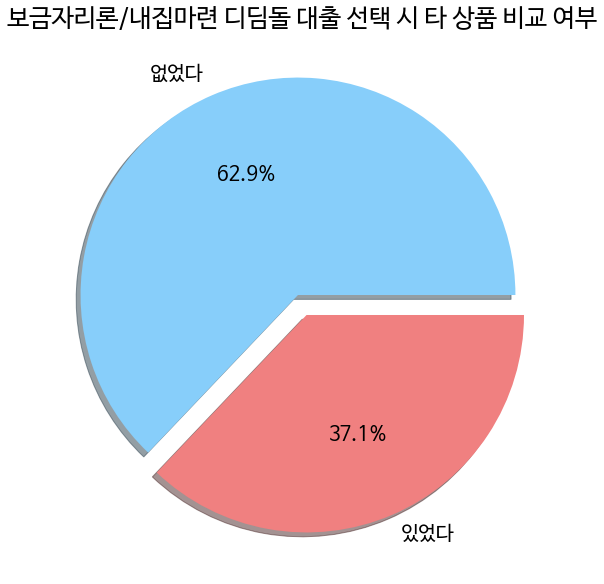

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(data22.iloc[:,5].value_counts(),
       labels = ['없었다', '있었다'],
        shadow = True,
        explode= [0.05] * 2,
        autopct = '%1.1f%%',
        colors = ['lightskyblue', 'lightcoral'],
        textprops = {'fontsize':20})
plt.title('보금자리론/내집마련 디딤돌 대출 선택 시 타 상품 비교 여부', fontsize = 25)
plt.show()

비교해 본 사람이 더 적긴 했지만,


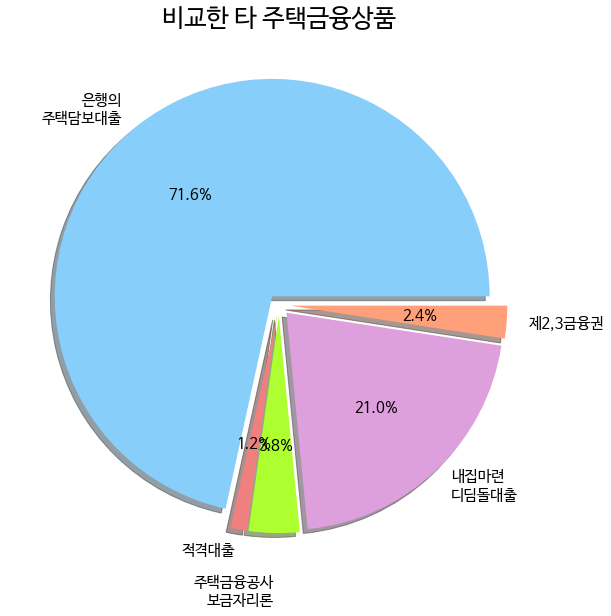

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(data22.iloc[:, 6].value_counts().sort_index(),
       labels = ['은행의\n주택담보대출', '적격대출',
                 '\n\n\n\n주택금융공사\n보금자리론', '내집마련\n디딤돌대출',
                '제2,3금융권'],
        colors = ['lightskyblue', 'lightcoral', 'greenyellow', 'plum', 'lightsalmon'],
        shadow = True,
        explode = [0.05] * 5,
        autopct = '%1.1f%%',
        textprops = {'fontsize':15})
plt.title('비교한 타 주택금융상품', fontsize = 25)
plt.show()

비교해 봤다는 사람들 중에서는
시중 은행의 주택담보대출과 비교했다는 사람들이 가장 많았습니다.

그래서 저희는 은행 주택담보대출과 보금자리론에 대해
더 분석해 보기로 했습니다.
구체적으로 그 둘은 어떤 차이가 있는지,
보금자리론은 쓸만한 상품인지 알아보겠습니다.


##2.1) 금리비교를 위해 정한 표본에 대한 설명

이제 5대 은행의 대출상품과 보금자리론을 비교해 볼 텐데요.
금융 상품을 선택하는 요인 1위가 금리였던만큼,
둘의 금리가 어떻게 다른지 보겠습니다.



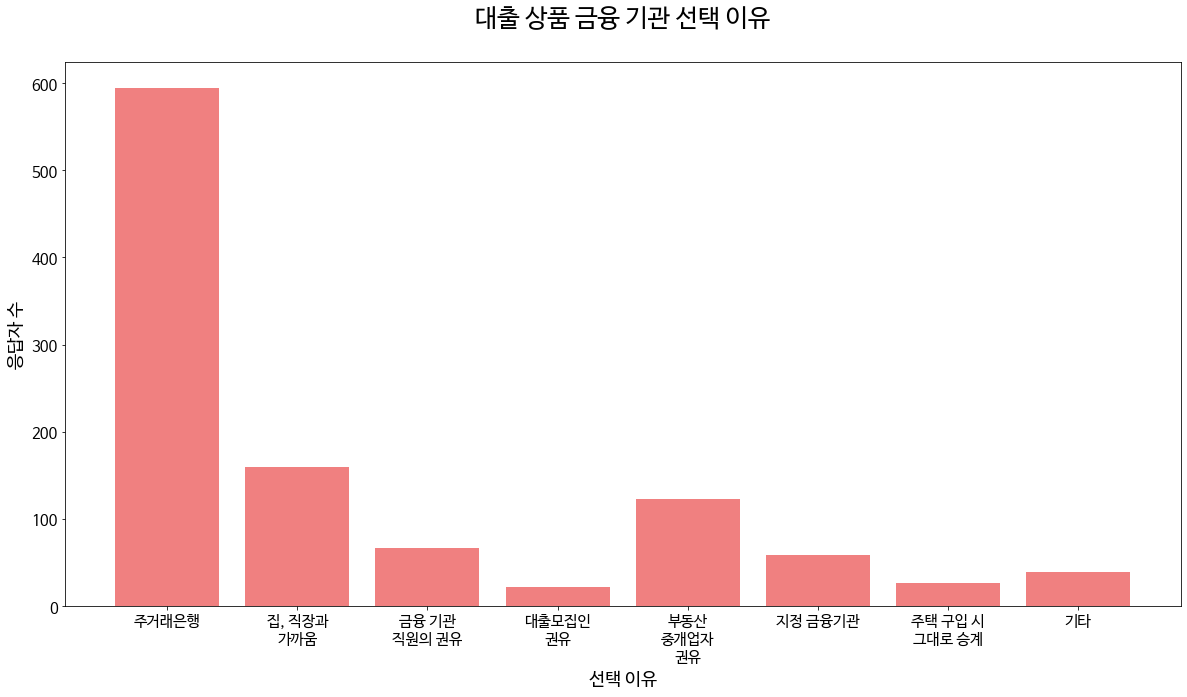

In [ ]:
## 왜 5대 은행의 금리를 선택했는지에 대한 자료
x = [i+1 for i in range(8)]
x_axis = np.arange(len(x))

plt.figure(figsize = (20,10))
plt.bar(x_axis, data22.iloc[:,4].value_counts().sort_index(),
        color='lightcoral')
  
plt.xticks(x_axis, x)
plt.xlabel("선택 이유", fontsize=18)
plt.ylabel("응답자 수", fontsize=18)
plt.title("대출 상품 금융 기관 선택 이유\n", fontsize=25)
plt.xticks(ticks = range(0,len(x)),
           labels = ['주거래은행', '집, 직장과\n가까움','금융 기관\n직원의 권유',
                     '대출모집인\n권유', '부동산\n중개업자\n권유', 
                     '지정 금융기관','주택 구입 시\n그대로 승계', '기타'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#색깔 추천 부탁드립니다

##2.2 시중은행의 금리 및 내용



##2.3 보금자리론에 대한 평가

먼저 자가가 아파트인 경우입니다.
이 경우에는 자가 가격 6억에 
대출 규모는 1억 5천만원인 상황을 가정했습니다.

In [ ]:
seoul_idx = data1[data12.iloc[:,6] == 1].index
seoul = data12.loc[seoul_idx]
seoul_apart = seoul[seoul.iloc[:, 2] == 4].index
seoul_noapart = seoul[seoul.iloc[:, 2] != 4].index

print('서울 거주 아파트 대출 비용 :', data13.loc[seoul_apart].iloc[:, 9].dropna().median())
print('서울 거주 아파트 매매가 :', data13.loc[seoul_apart].iloc[:, 10].dropna().median())
print('\n')
print('서울 거주 아파트 이외 대출 비용 :', data13.loc[seoul_noapart].iloc[:, 9].dropna().median())
print('서울 거주 아파트 이외 매매가 :', data13.loc[seoul_noapart].iloc[:, 10].dropna().median())

서울 거주 아파트 대출 비용 : 16000.0
서울 거주 아파트 매매가 : 56500.0


서울 거주 아파트 이외 대출 비용 : 8000.0
서울 거주 아파트 이외 매매가 : 24000.0


시중 은행 대출 상품의 경우
변동금리는 연 최저 3% 후반대에서 최고 5% 초반,
고정금리는 연 최저 4% 안팎에서 최고 5% 중반의 금리 수준을 보였습니다.

자가가 아파트가 아닌 경우에도 비슷했는데요,
자가 가격 2억 4천만원에 대출 규모는 8천만원인 상황에서
시중 은행 대출 상품의 금리는 아파트에서와 비슷했습니다.

반면 보금자리론은 고정금리로 연 3.2% 금리로 이용할 수 있죠.
각종 우대 사항들을 최대한 적용하면 연 1.2%까지 금리가 낮아지기 때문에
타 은행의 고정금리 상품들과 비교하면
최소 0.5%p, 최대 4.5%p까지도 저렴해질 수 있습니다.


In [ ]:
#PPT에서 표를 통하여 제시할건지, 시각화 자료를 만들건지에 대한 의견 부탁드립니다.

특히, 변동금리를 선호하는 사람들에게
어느 정도의 금리차이면 고정금리로 이동하겠느냐고 물은 질문에,



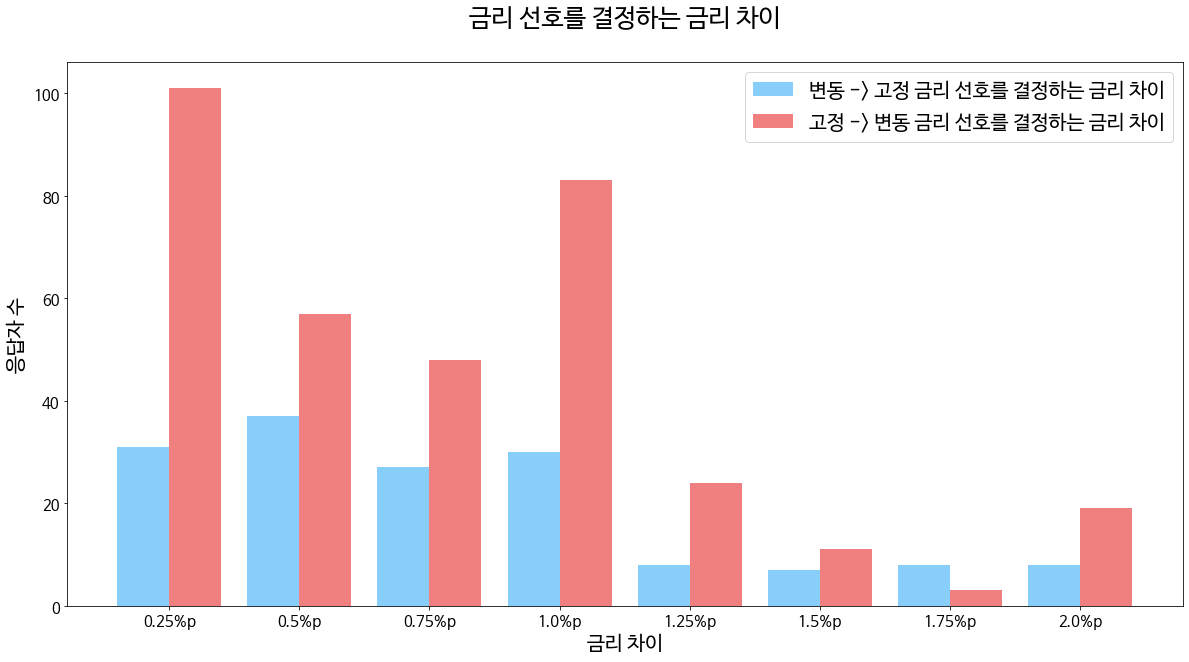

In [ ]:
x = [x+1 for x in range(8)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis-0.2, data15.iloc[:,15].value_counts().sort_index(), 
        label = '변동 -> 고정 금리 선호를 결정하는 금리 차이',
        color = 'lightskyblue', width = 0.4)
plt.bar(x_axis+0.2, data15.iloc[:,17].value_counts().sort_index(), 
        label = '고정 -> 변동 금리 선호를 결정하는 금리 차이', 
        color = 'lightcoral', width = 0.4)
plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['0.25%p', '0.5%p', '0.75%p', '1.0%p',
                   '1.25%p', '1.5%p', '1.75%p', '2.0%p'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('금리 차이', fontsize = 20)
plt.ylabel('응답자 수', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.title('금리 선호를 결정하는 금리 차이\n', fontsize = 25)
plt.show()

대부분의 응답자가 0.25%p ~ 1%p 차이면 이동하겠다고 답했습니다.

시중은행의 변동금리 상품과 비교해도
0.5%p에서 4%p까지 금리가 낮기 때문에
변동금리를 선호하는 사람들의 마음도 돌릴 수 있겠습니다. 

#3. 본론2 - 분석 목표 제시 (대출 한도 파트)
보금자리론의 금리, 좋습니다.
시중 상품에 비해 사람들이 만족할 만 했습니다.
그렇다면, 대출 한도는 어떨까요?


##3.1 금리 다음으로 고려되는 사항이라는 자료 제시
금리 못지않게 대출 한도도 중요한데요,
일반 가구 대상 설문에서
주택담보대출 상품 개편 시 개선점에 대해 묻자



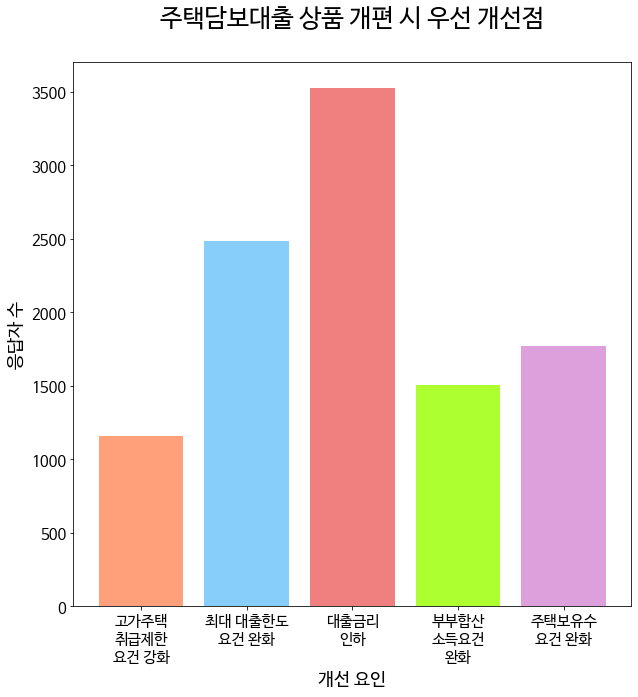

In [ ]:
x = [i+1 for i in range(5)]
x_axis = np.arange(len(x))

plt.figure(figsize = (10,10))
plt.bar(x_axis, data16.iloc[:,6:11].count(), 
        color=['lightsalmon','lightskyblue','lightcoral', 'greenyellow', 'plum'])
  
plt.xticks(x_axis, x)
plt.xlabel("개선 요인", fontsize=18)
plt.ylabel("응답자 수", fontsize=18)
plt.title("주택담보대출 상품 개편 시 우선 개선점\n", fontsize=25)
plt.xticks(ticks = range(0,len(x)),
           labels = ['고가주택\n취급제한\n요건 강화',
                     '최대 대출한도\n요건 완화',
                     '대출금리\n인하', '부부합산\n소득요건\n완화',
                     '주택보유수\n요건 완화'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.show()

1위가 금리 인하, 2위가 대출한도 요건 완화였습니다.
금리가 낮더라도 내가 필요한 만큼 대출받을 수 없다면 무용지물이겠죠.
그래서 이번에는 상품의 대출한도가 적절한지 알아 보겠습니다.

##3.2 내집마련 하고싶다
디딤돌대출과 보금자리론의 주요 용도 중 하나는 내집마련입니다.
일반 가구 5천명에게 주택 소유의 필요성에 대한 인식을 묻자,


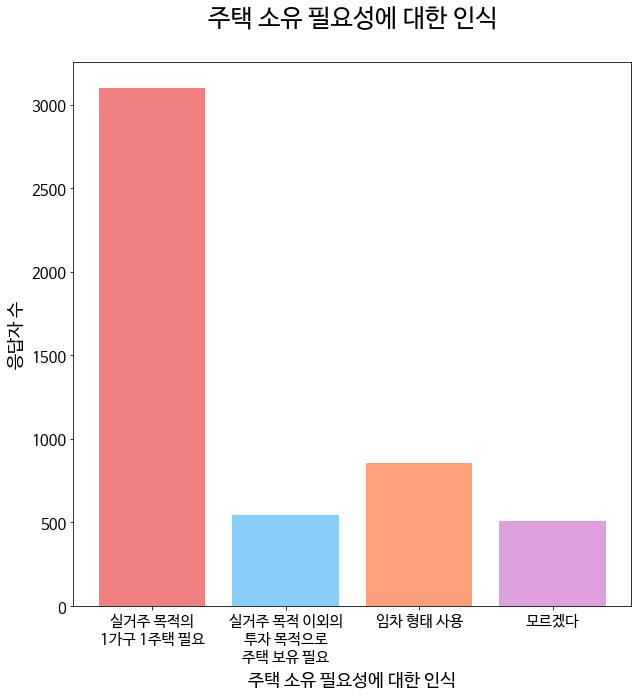

In [ ]:
x = ['1', '2', '3', '4']
x_axis = np.arange(len(x))

plt.figure(figsize = (10,10))
plt.bar(x_axis, data16.iloc[:,0].value_counts().sort_index(), 
        color=['lightcoral','lightskyblue','lightsalmon', 'plum'])
  
plt.xticks(x_axis, x)
plt.xlabel("주택 소유 필요성에 대한 인식", fontsize=18)
plt.ylabel("응답자 수", fontsize=18)
plt.title("주택 소유 필요성에 대한 인식\n", fontsize=25)
plt.xticks(ticks = range(0,len(x)),
           labels = ['실거주 목적의\n1가구 1주택 필요', 
                     '실거주 목적 이외의\n투자 목적으로\n주택 보유 필요',
                    '임차 형태 사용', '모르겠다'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.show()

실거주 목적의 1가구 1주택이 필요하다는 응답이 압도적이었습니다.
보금자리론만 있으면 우리도 내집마련, 가능할까요?


###3-3) 어느 지역을 조사할까? 사람이 많은 곳의 집값을 조사하자!
우선 보금자리론/디딤돌 대출을 많이 사용하는 지역은 어딜까? 서울, 경기권이다.

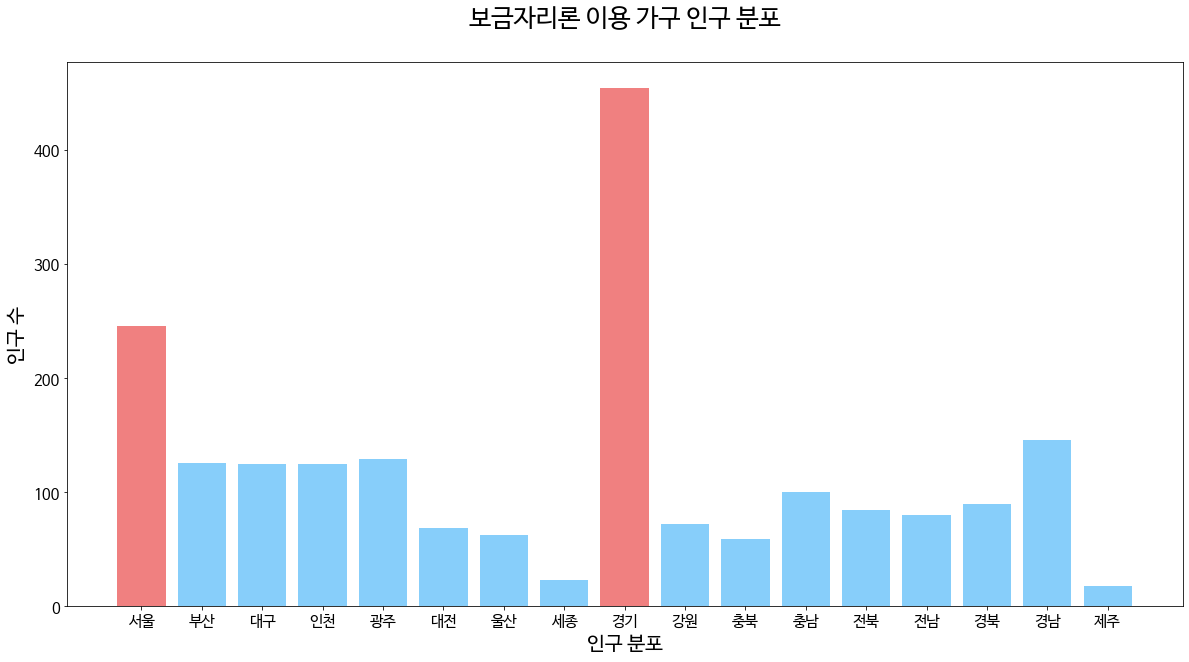

In [ ]:
#보금자리론/디딤돌 대출 사용 가구 지역
x = [x+1 for x in range(17)]
x_axis = np.arange(len(x))
plt.figure(figsize = (20,10))
plt.bar(x_axis, data21.iloc[:,0].value_counts().sort_index(), 
        label = '인구 수', 
        color = ['lightcoral', 'lightskyblue', 'lightskyblue', 'lightskyblue',
                'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue',
                'lightcoral', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue'])

plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = ['서울', '부산','대구','인천','광주','대전',
                   '울산','세종','경기','강원','충북','충남','전북',
                   '전남','경북','경남','제주'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('인구 분포', fontsize = 20)
plt.ylabel('인구 수', fontsize = 20)
plt.title('보금자리론 이용 가구 인구 분포\n', fontsize = 25)
plt.show()

#색깔 추천 부탁드립니다

In [ ]:
#@title 숨김
# popul_seoul = popul[1:26]
# popul_gyeonggi = popul[27:]
# popul_gyeonggi = popul_gyeonggi[popul_gyeonggi['총인구수 (명)'] > 0]

# x = [i+1 for i in range(25)]
# x_axis = np.arange(len(x))
# x1 = [i+1 for i in range(48)]
# x1_axis = np.arange(len(x1))

# plt.subplots(2,1,figsize = (20,30))
# plt.subplot(2,1,1)
# plt.bar(x_axis, popul_seoul.sort_values('총인구수 (명)', ascending = False)['총인구수 (명)'],
#         color= 'lightcoral')
# plt.xticks(x_axis, x)
# plt.ylabel("총 인구 수", fontsize=18)
# plt.xlabel("행정 구역", fontsize = 18)
# plt.title("행정 구역 별 총 인구 수 - 서울\n", fontsize=25)
# plt.xticks(ticks = range(0,len(x)),
#            labels = popul_seoul.sort_values('총인구수 (명)', ascending = False)['행정구역(시군구)별'],
#            fontsize=15, rotation = 30)
# plt.yticks(fontsize=15)

# plt.subplot(2,1,2)
# plt.bar(x1_axis, popul_gyeonggi.sort_values('총인구수 (명)', ascending = False)['총인구수 (명)'],
#         color= 'lightskyblue')
# plt.xticks(x1_axis, x1)
# plt.ylabel("총 인구 수", fontsize=18)
# plt.xlabel("행정 구역", fontsize = 18)
# plt.title("행정 구역 별 총 인구 수 - 경기도\n", fontsize=25)
# plt.xticks(ticks = range(0,len(x1)),
#            labels = popul_gyeonggi.sort_values('총인구수 (명)', ascending = False)['행정구역(시군구)별'],
#            fontsize=12, rotation = 30)
# plt.yticks(fontsize=15)
# plt.show()

# #그래프가 너무 난잡하면 그냥 서울, 경기 별 top5~6만 뽑아서 표로 하는게 더 깔끔할 수도 있습니다.

2020년 수도권 아파트 매매 데이터를 활용해
우리나라 집값 현황에 대해 알아 봤습니다.
우선 서울입니다.


In [ ]:
apart_seoul = apart[(apart['first'] == '서울특별시')]
apart_gyeonggi = apart[(apart['first'] == '경기도')]
noapart_seoul = noapart[(noapart['first'] == '서울특별시')]
noapart_gyeonggi = noapart[(noapart['first'] == '경기도')]

In [ ]:
apart_seoul_med = pd.DataFrame(apart_seoul.groupby(by = 'second').median())
noapart_seoul_med = pd.DataFrame(noapart_seoul.groupby(by = 'second').median())
apart_gyeonggi_med = pd.DataFrame(apart_gyeonggi.groupby(by = 'second').median())
noapart_gyeonggi_med = pd.DataFrame(noapart_gyeonggi.groupby(by = 'second').median())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


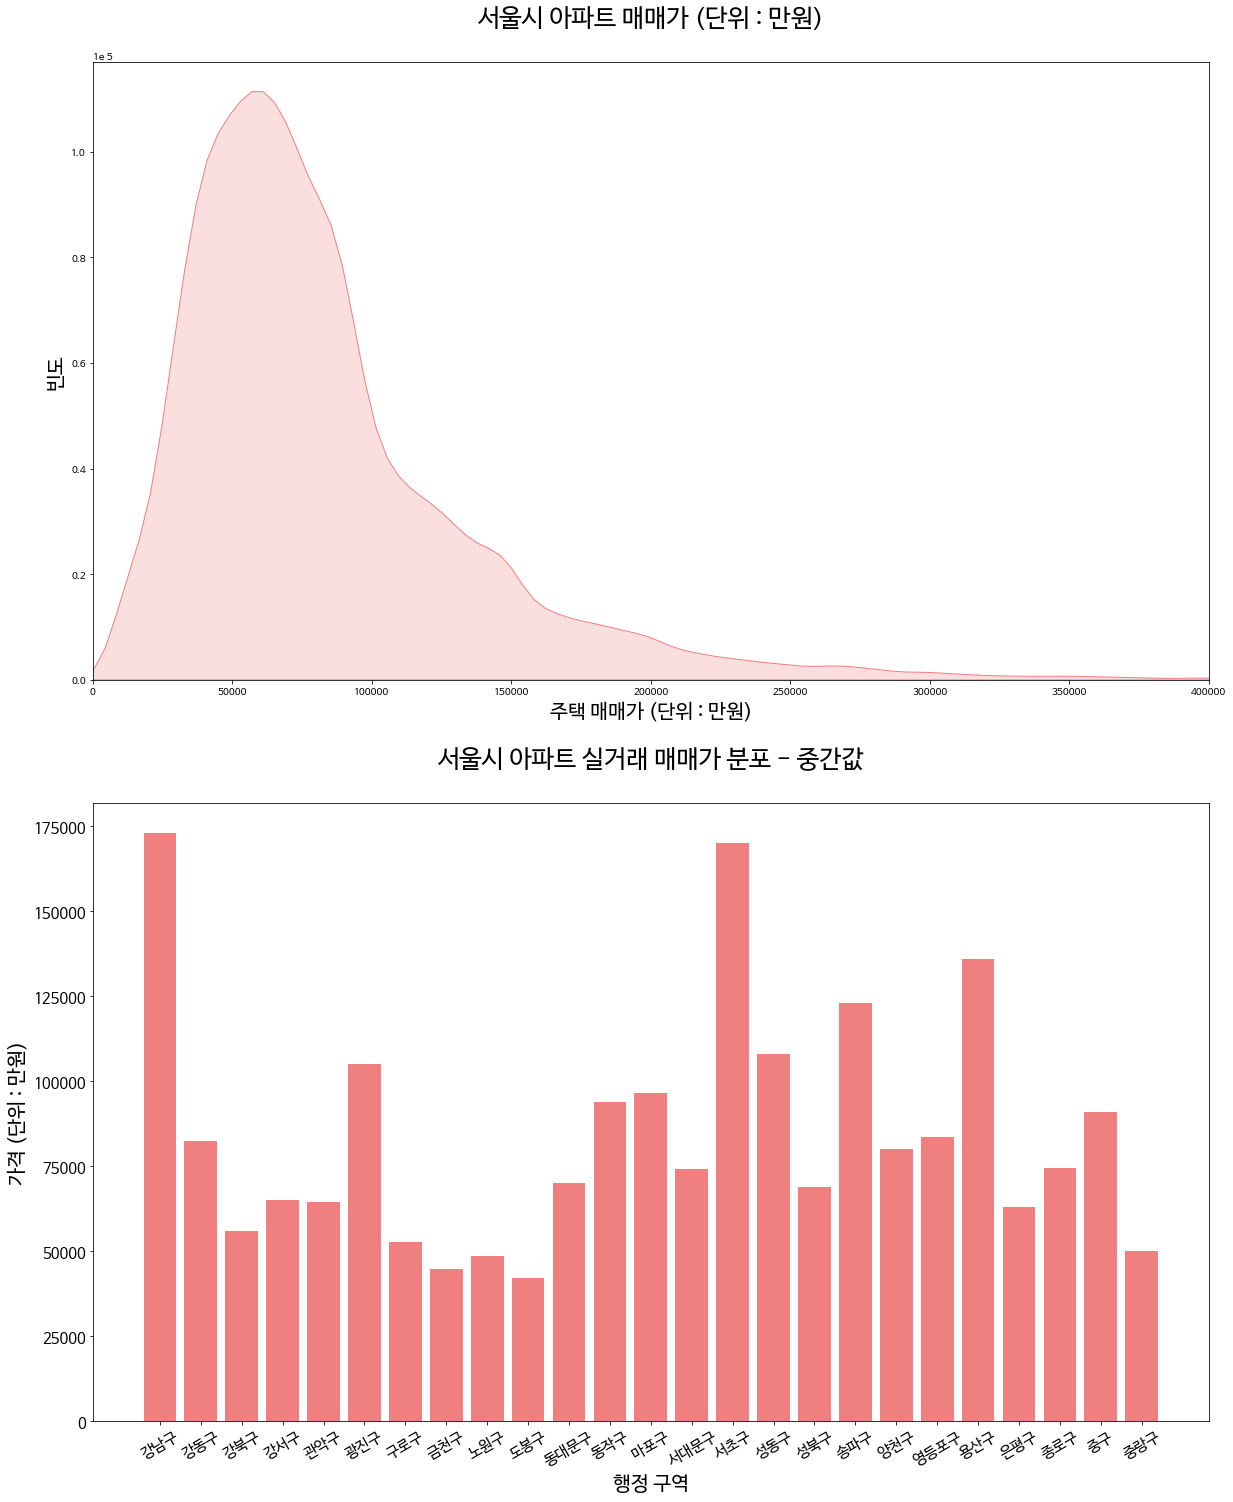

In [ ]:
#서울내 아파트 실거래 매매가 데이터
plt.subplots(2,1,figsize = (20,25))

plt.subplot(2,1,1)
sns.kdeplot(apart_seoul['거래금액(만원)'], shade = True, color = 'lightcoral')
plt.xlabel('주택 매매가 (단위 : 만원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.xlim(0,400000)
plt.title('서울시 아파트 매매가 (단위 : 만원)\n', fontsize = 25)

plt.subplot(2,1,2)
x = [x+1 for x in range(len(apart_seoul_med))]
x_axis = np.arange(len(x))
plt.bar(x_axis, apart_seoul_med['거래금액(만원)'], 
        color = 'lightcoral')

plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = apart_seoul_med.index, fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.xlabel('행정 구역', fontsize = 20)
plt.ylabel('가격 (단위 : 만원)', fontsize = 20)
plt.title('서울시 아파트 실거래 매매가 분포 - 중간값\n', fontsize = 25)
plt.show()

#색깔 추천 부탁드립니다

In [ ]:
#@title 혹시몰라서 만들어 봤습니다 (서울내 아파트 이외 주택 실거래 매매가 데이터)

plt.subplots(2,1,figsize = (20,25))

plt.subplot(2,1,1)
sns.kdeplot(noapart_seoul['거래금액(만원)'], shade = True, color = 'lightcoral')
plt.xlabel('주택 매매가 (단위 : 만원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.xlim(0,200000)
plt.title('서울시 아파트 이외 주택 매매가 (단위 : 만원)\n', fontsize = 25)

plt.subplot(2,1,2)
x = [x+1 for x in range(len(noapart_seoul_med))]
x_axis = np.arange(len(x))
plt.bar(x_axis, noapart_seoul_med['거래금액(만원)'], 
        color = 'lightcoral')

plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = noapart_seoul_med.index, fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.xlabel('행정 구역', fontsize = 20)
plt.ylabel('가격 (단위 : 만원)', fontsize = 20)
plt.title('서울시 아파트 이외 주택 실거래 매매가 분포 - 중간값\n', fontsize = 25)
plt.show()

#색깔 추천 부탁드립니다

In [ ]:
print('서울 아파트 \n', apart_seoul['거래금액(만원)'].describe(), '\n')
print('서울 아파트 이외\n',noapart_seoul['거래금액(만원)'].describe(), '\n')

서울 아파트 
 count     84242.000000
mean      84714.495477
std       56754.994446
min        6000.000000
25%       48750.000000
50%       71000.000000
75%      103000.000000
max      775000.000000
Name: 거래금액(만원), dtype: float64 

서울 아파트 이외
 count    9.009400e+04
mean     4.164811e+04
std      6.336486e+04
min      1.700000e+03
25%      1.880000e+04
50%      2.615000e+04
75%      3.950000e+04
max      2.900000e+06
Name: 거래금액(만원), dtype: float64 



구 별로 거래된 아파트의 매매가 중위수를 뽑아 봤습니다.
현재 디딤돌대출의 최대 한도는 3억 1천만원,
보금자리론은 3억 6천만원입니다.
최대로 다 대출받았다고 해 보죠.
3억 6천만원이면 어느 구로 가야 할까요...
네, 모든 구의 매매가 중위수보다 적습니다.
보통의 서울 아파트, 보금자리론으로는 사기 힘듭니다.


그럼 눈을 조금 낮춰서 경기도를 봅시다.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


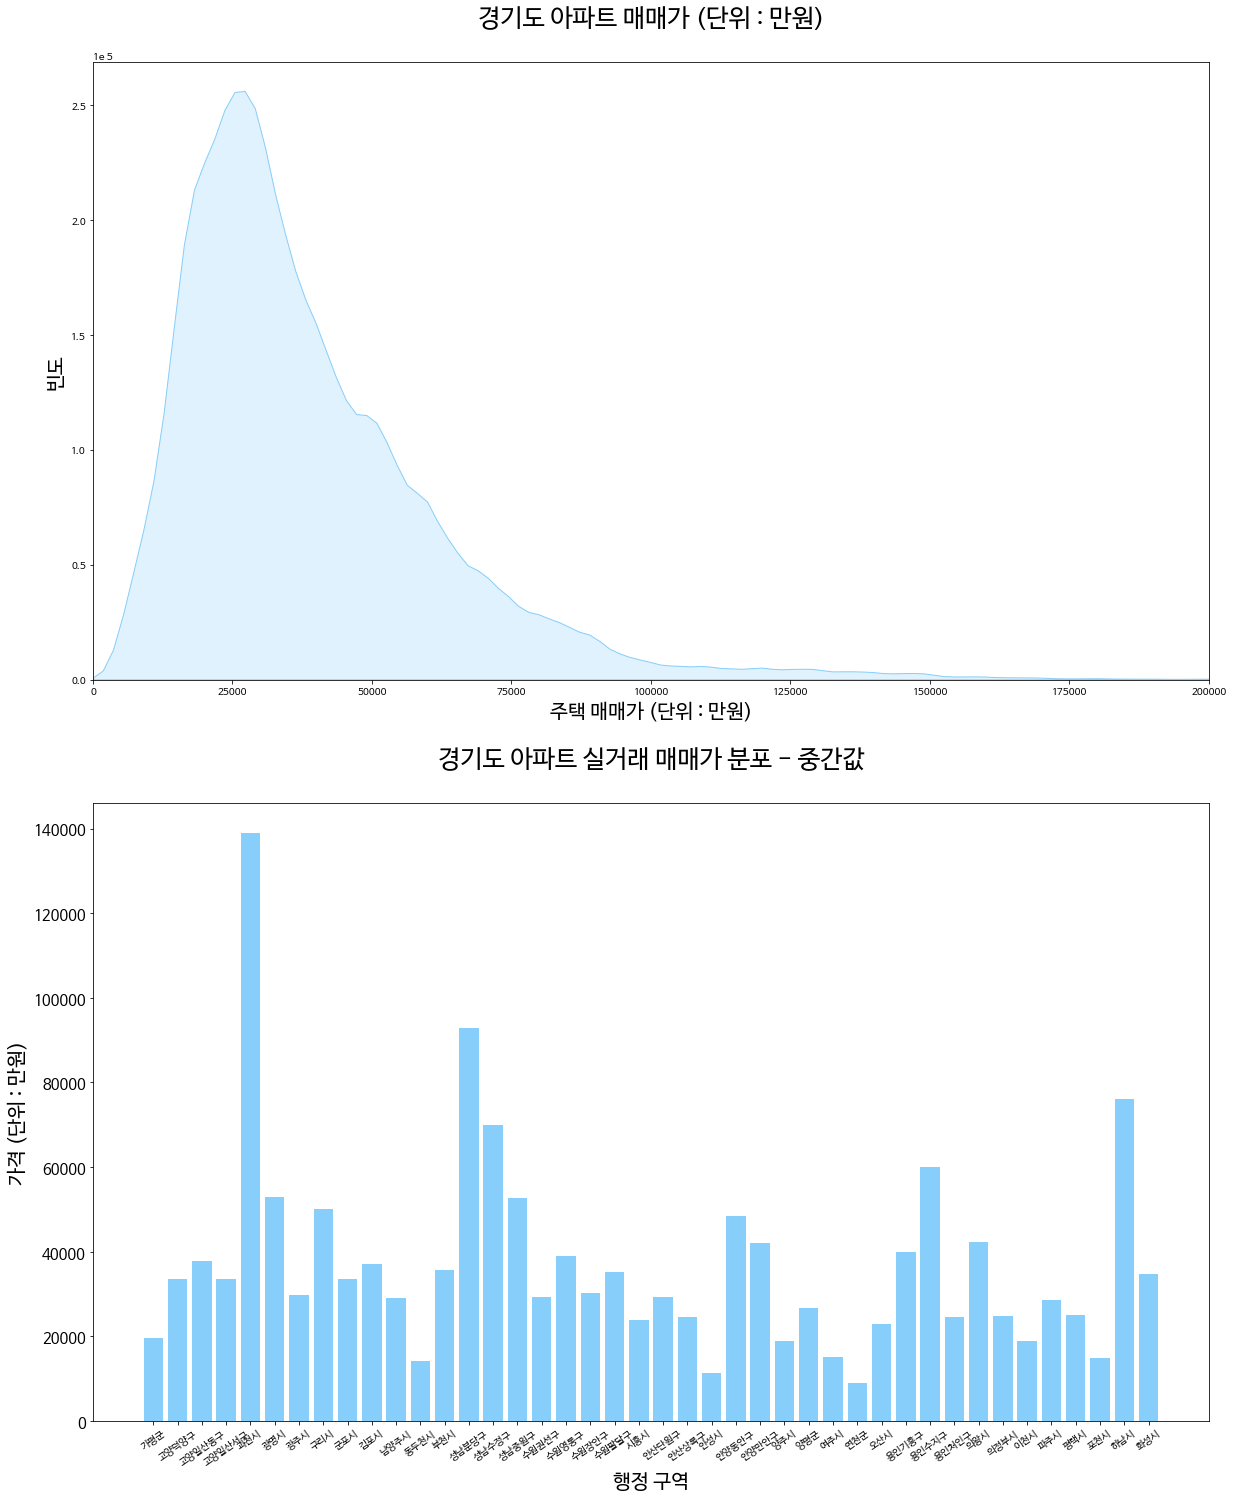

In [ ]:
#경기도내 아파트 실거래 매매가 데이터
plt.subplots(2,1,figsize = (20,25))

plt.subplot(2,1,1)
sns.kdeplot(apart_gyeonggi['거래금액(만원)'], shade = True, color = 'lightskyblue')
plt.xlabel('주택 매매가 (단위 : 만원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.xlim(0,200000)
plt.title('경기도 아파트 매매가 (단위 : 만원)\n', fontsize = 25)

plt.subplot(2,1,2)
x = [x+1 for x in range(len(apart_gyeonggi_med))]
x_axis = np.arange(len(x))
plt.bar(x_axis, apart_gyeonggi_med['거래금액(만원)'], 
        color = 'lightskyblue')

plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = apart_gyeonggi_med.index, fontsize = 10, rotation = 35)
plt.yticks(fontsize = 15)
plt.xlabel('행정 구역', fontsize = 20)
plt.ylabel('가격 (단위 : 만원)', fontsize = 20)
plt.title('경기도 아파트 실거래 매매가 분포 - 중간값\n', fontsize = 25)
plt.show()

#색깔 추천 부탁드립니다

In [ ]:
#@title 혹시몰라서 만들어 봤습니다 (경기도 아파트 이외 주택 실거래 매매가 데이터)

plt.subplots(2,1,figsize = (20,25))

plt.subplot(2,1,1)
sns.kdeplot(noapart_gyeonggi['거래금액(만원)'], shade = True, color = 'lightskyblue')
plt.xlabel('주택 매매가 (단위 : 만원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.xlim(0,150000)
plt.title('경기도 아파트 이외 주택 매매가 (단위 : 만원)\n', fontsize = 25)

plt.subplot(2,1,2)
x = [x+1 for x in range(len(noapart_gyeonggi_med))]
x_axis = np.arange(len(x))
plt.bar(x_axis, noapart_gyeonggi_med['거래금액(만원)'], 
        color = 'lightskyblue')

plt.xticks(x_axis, x)
plt.xticks(ticks = range(len(x)),
          labels = noapart_gyeonggi_med.index, fontsize = 10, rotation = 35)
plt.yticks(fontsize = 15)
plt.xlabel('행정 구역', fontsize = 20)
plt.ylabel('가격 (단위 : 만원)', fontsize = 20)
plt.title('경기도 아파트 이외 주택 실거래 매매가 분포 - 중간값\n', fontsize = 25)
plt.show()

#색깔 추천 부탁드립니다

In [ ]:
print('경기도 아파트 \n',apart_gyeonggi['거래금액(만원)'].describe(), '\n')
print('경기도 아파트 이외\n',noapart_gyeonggi['거래금액(만원)'].describe(), '\n')

경기도 아파트 
 count    258223.000000
mean      39085.178776
std       24058.351841
min         562.000000
25%       22900.000000
50%       33000.000000
75%       49900.000000
max      350000.000000
Name: 거래금액(만원), dtype: float64 

경기도 아파트 이외
 count     91316.000000
mean      26465.845383
std       27864.639715
min         500.000000
25%       12000.000000
50%       18200.000000
75%       30000.000000
max      850000.000000
Name: 거래금액(만원), dtype: float64 



경기도의 경우에는 확실히 서울보다는 집값이 싸서,
36개 시/군/구 가운데 24개 지역에서는 집을 살 수 있습니다.
하지만 이 중에는 파주, 연천처럼 서울에서 먼 지역도 있고
모두가 최고 한도로 대출받을 수 있는 건 아니다보니
여전히 우리가 원하는 조건의 집을 살 수 있게 될 확률은 
조금 낮아 보입니다.


이런 생각, 이용자들도 똑같이 했습니다.
2000명 중 559명은 대출한도 변경이 필요하다고 답했는데요,
변경을 원하는 대출한도의 중간값은 4억원이었습니다.
조금은 더 높기를 바라는 것이죠.

(여기 아까 발표할 때 승연님이 5억이라고 얘기했었는데,
제가 그 부분이 어딘지 정확히 못 찾아서
일단 이용자 대상 설문에서 대체했습니다.
어딘지 알려주시면 바로 그에 맞게 수정하겠습니다!)



###적절한 보금자리론 대출 조건 수준에 대한 설문
만약 주택가격, 대출한도, 소득요건에 대해 모두 보이는 plot의 경우 주택가격이나 소득요건에 비해서 대출한도에 대해 변경을 요하는 사람들이 많았다라고 주장 가능하고

만약 대출한도에 대한 plot만 보이면 현행을 유지하자는 사람이 과반이긴 하지만 변경을 필요로 하는 사람도 많음을 보일 수 있음

만약 나16 보금자리 대출 조건 강화에 대한 의견에서 대출한도에서 부정적인 반응을 보인 설문자로 제한하여 대출한도 변경 필요 여부에 대한 plot을 그리면 매우 많아보임.

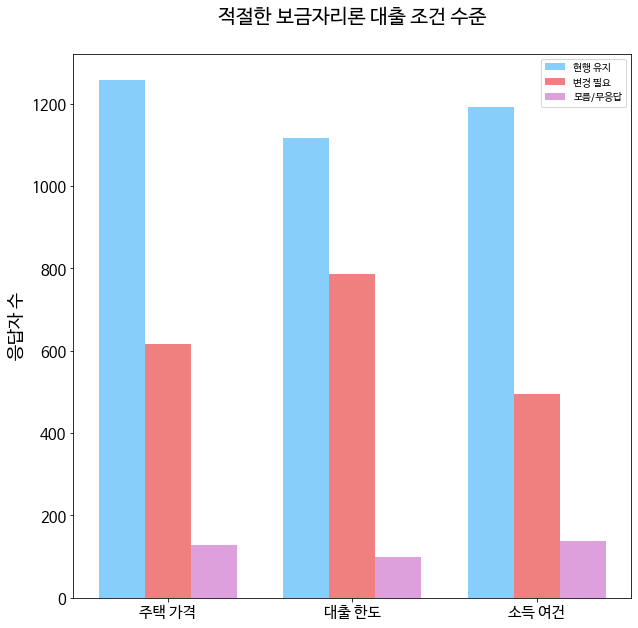

In [ ]:
#주택가격, 대출한도, 소득요건에 대해 모두 보이는 plot
price = pd.DataFrame(data22.iloc[:,40].value_counts().sort_index())
limit = pd.DataFrame(data22.iloc[:,42].value_counts().sort_index())
income = pd.DataFrame(data22.iloc[:,44].value_counts().sort_index())
income = income.drop(3)
price.index = ['현행 유지', '변경 필요', '모름']
limit.index = ['현행 유지', '변경 필요', '모름']
income.index = ['현행 유지', '변경 필요', '모름']

aaa = pd.concat([price, limit], axis = 1)
bbb = pd.concat([aaa, income], axis = 1)

x = [i+1 for i in range(3)]
x_axis = np.arange(len(x))

plt.figure(figsize = (10,10))
plt.bar(x_axis - 0.25, bbb.iloc[0],
        0.25, label = '현행 유지', color='lightskyblue')
plt.bar(x_axis, bbb.iloc[1],
        0.25, label = '변경 필요', color='lightcoral')
plt.bar(x_axis + 0.25, bbb.iloc[2],
        0.25, label = '모름/무응답', color='plum')

plt.xticks(x_axis, x)
plt.ylabel("응답자 수", fontsize=18)
plt.title("적절한 보금자리론 대출 조건 수준\n", fontsize=20)
plt.xticks(ticks = range(0,len(x)),
           labels = ['주택 가격', '대출 한도','소득 여건'],
           fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 'best')

plt.show()

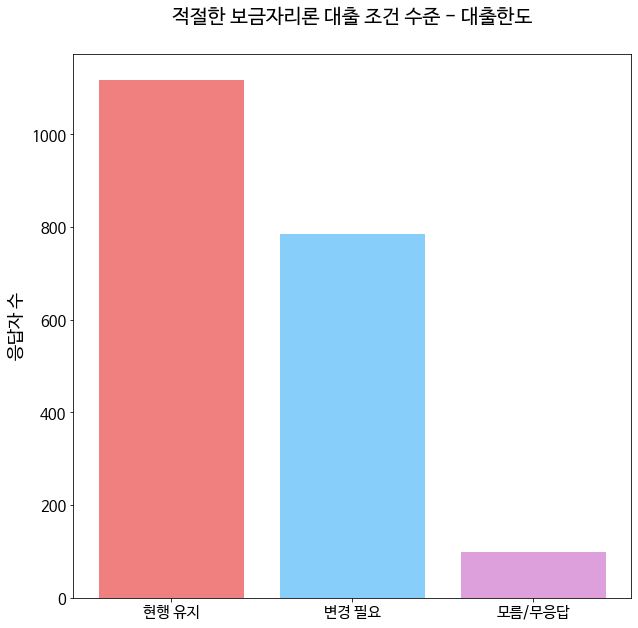

In [ ]:
#대출한도에 대한 plot
x = [i+1 for i in range(3)]
x_axis = np.arange(len(x))

plt.figure(figsize = (10,10))
plt.bar(x_axis, data22.iloc[:,42].value_counts().sort_index(), 
        color=['lightcoral', 'lightskyblue', 'plum'])
  
plt.xticks(x_axis, x)
plt.ylabel("응답자 수", fontsize=18)
plt.title("적절한 보금자리론 대출 조건 수준 - 대출한도\n", fontsize=20)
plt.xticks(ticks = range(0,len(x)),
           labels = ['현행 유지', '변경 필요','모름/무응답'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.show()

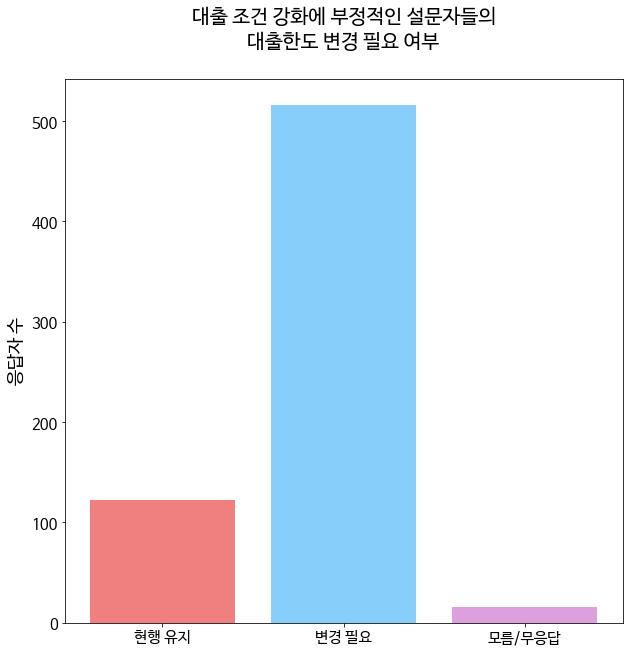

In [ ]:
#나16 보금자리 대출 조건 강화에 대한 의견에서 
#대출한도에서 부정적인 반응을 보인 설문자로 제한하여 대출한도 변경 필요 여부에 대한 plot
neg = data22[data22.iloc[:,38] == 2].index

x = [i+1 for i in range(3)]
x_axis = np.arange(len(x))

plt.figure(figsize = (10,10))
plt.bar(x_axis, data22.loc[neg].iloc[:,42].value_counts().sort_index(), 
        color=['lightcoral', 'lightskyblue', 'plum'])
  
plt.xticks(x_axis, x)
plt.ylabel("응답자 수", fontsize=18)
plt.title("대출 조건 강화에 부정적인 설문자들의\n대출한도 변경 필요 여부\n", fontsize=20)
plt.xticks(ticks = range(0,len(x)),
           labels = ['현행 유지', '변경 필요','모름/무응답'],
           fontsize=15)
plt.yticks(fontsize=15)

plt.show()

###대출한도 변경을 원하는 사람들이 원하는 대출 한도 빈도 그래프
5억부근에서 중앙값, 최빈값 모두 등장

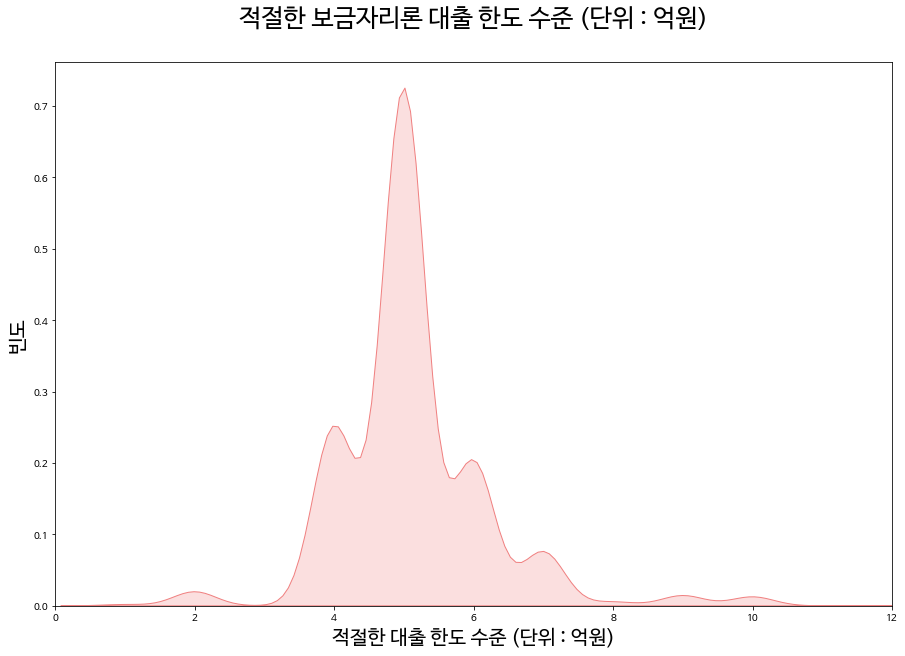

In [ ]:
#대출한도 변경을 원하는 사람들이 원하는 대출 한도 빈도 그래프
change = data22[data22.iloc[:, 42] == 2].index

plt.figure(figsize = (15,10))
sns.kdeplot(data22.loc[change].iloc[:,43], shade = True, color = 'lightcoral')
plt.xlabel('적절한 대출 한도 수준 (단위 : 억원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.title('적절한 보금자리론 대출 한도 수준 (단위 : 억원)\n', fontsize = 25)
plt.xlim(0,12)
plt.show()

In [ ]:
data22.loc[change].iloc[:,43].describe()

count    728.000000
mean       5.145604
std        1.142264
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       15.000000
Name: 나17. 적절한 보금자리론 대출 조건 수준 - 대출한도 (억원), dtype: float64

1주택자가 주택담보대출 형태로 보금자리론을 이용하려고 할 때도
이게 다시 문제가 되는데요,
앞서 살펴 보았듯 주택 담보대출을 이용한 사람의
자가 가격 중위수가 6억이었습니다.
현재 거래가 6억 이상인 자가를 보유한 사람은 보금자리론을
이용할 수 없게 되어 있습니다.
영혼까지 끌어모아 겨우겨우 서울에 내집마련 해도,
집이 6억보다 비싸다면 보금자리론은 이용할 수 없습니다.

#4. 결론
결론입니다.
디딤돌대출과 보금자리론은 금리 면에서는 정말 경쟁력 있었습니다.
고정금리임에도 시중 상품보다 금리가 확연히 낮았고,
2022년 현재는 금리가 오르는 추세기 때문에 더 좋아 보입니다.

대출한도는 조금 아쉬웠습니다.
어차피 2주택 이상을 보유한 사람은 이용할 수 없어서
투기 목적으로의 악용도 힘든 상품입니다.
내집마련하고 싶고, 
영끌해서 여유자금 없는 사람들을 위한 서비스인만큼
자가 가격 제한 6억, 최대 대출한도 3억 6천,
조금은 풀어줘도 좋지 않을까 합니다.

저희 발표는 여기까지입니다.
데이터 자체도 양이 많고 시간도 촉박하다 보니
결론을 내고 싶었는데 못 낸 변수들도 많았습니다.
세대별, 결혼 형태별 차이도 분석하고 싶었는데
그러지 못한 점이 아쉽습니다.
지역도 수도권에만 집중했구요.
부족한 발표 경청해 주셔서 감사합니다.
EDA D조였습니다. 감사합니다!

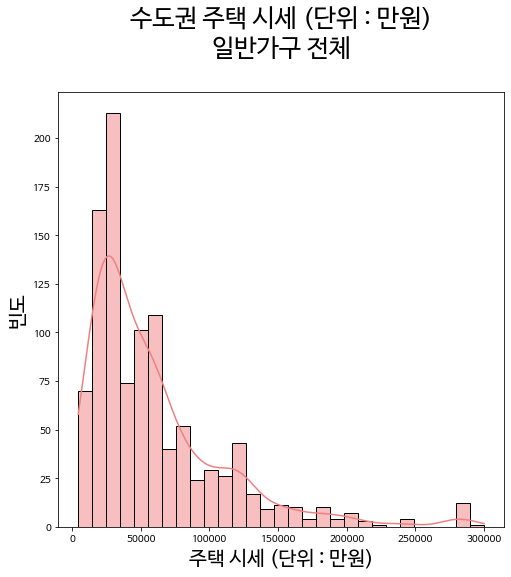

In [ ]:
sudo = data12[(data12.iloc[:,6] == 1)|(data12.iloc[:,6] == 9)].index

plt.figure(figsize = (8,8))
sns.histplot(data12.loc[sudo].iloc[:,8], color = 'lightcoral', kde = True)
plt.xlabel('주택 시세 (단위 : 만원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.title('수도권 주택 시세 (단위 : 만원)\n일반가구 전체\n', fontsize = 25)
plt.show()

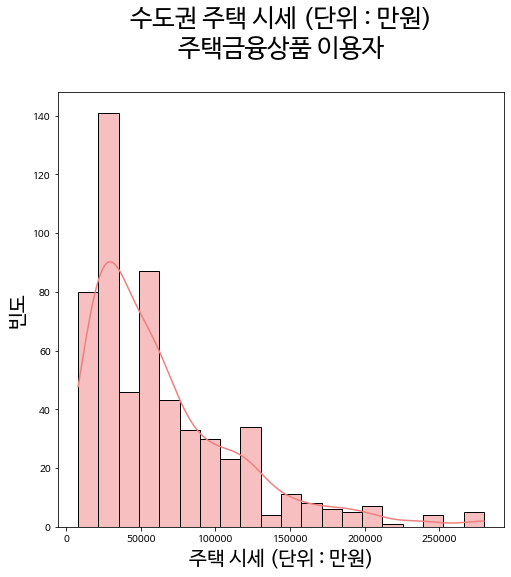

In [ ]:
user = data13[data13.iloc[:,0] == 1].index
a = data12.loc[user]
sudo2 = a[(a.iloc[:,6] == 1)|(a.iloc[:,6] == 9)].index

plt.figure(figsize = (8,8))
sns.histplot(data12.loc[sudo2].iloc[:,8], color = 'lightcoral', kde = True)
plt.xlabel('주택 시세 (단위 : 만원)', fontsize = 20)
plt.ylabel('빈도', fontsize = 20)
plt.title('수도권 주택 시세 (단위 : 만원)\n주택금융상품 이용자\n', fontsize = 25)
plt.show()